## Pre Processing Procedure of adult dataset

In [88]:
#Importing necessary packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### Dataframe Creation

In [89]:
# Reading the data files
with open('dataset/adult.data','r') as adult_data:
    row_data_array = adult_data.readlines()

# Creating an array to store the data by rows in order to change it to differnt columns
data_rows = []
#Arranging the data columns doing necessary splittings
for data_row in row_data_array:
    data_rows.append(data_row)

# Splitting the dataset to necessary columns
dataset_array = []
for data_row in data_rows:
    dataset_array.append(data_row.split(','))

In [90]:
# Creating the dataset_array to a pandas dataframe in order to work in future
adult_dataset = pd.DataFrame(dataset_array)
adult_dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n


### Test Dataframe Creation

In [91]:
# Reading the data files
with open('dataset/adult.test','r') as test_adult_data:
    test_data_array = test_adult_data.readlines()

# Creating an array to store the data by rows in order to change it to differnt columns
test_data_rows = []
#Arranging the data columns doing necessary splittings
for data_row in test_data_array:
    test_data_rows.append(data_row)

# Splitting the dataset to necessary columns
test_dataset_array = []
for data_row in test_data_rows:
    test_dataset_array.append(data_row.split(','))

In [92]:
# Creating the dataset_array to a pandas dataframe in order to work in future
test_adult_dataset = pd.DataFrame(test_dataset_array)
test_adult_dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.\n
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.\n
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.\n
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.\n
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.\n


### Combining the Both Test and Train Dataset

In [93]:
# Combining both dataset
adult_dataset = pd.concat([adult_dataset, test_adult_dataset], ignore_index=True)
adult_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48844 entries, 0 to 48843
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       48844 non-null  object
 1   1       48842 non-null  object
 2   2       48842 non-null  object
 3   3       48842 non-null  object
 4   4       48842 non-null  object
 5   5       48842 non-null  object
 6   6       48842 non-null  object
 7   7       48842 non-null  object
 8   8       48842 non-null  object
 9   9       48842 non-null  object
 10  10      48842 non-null  object
 11  11      48842 non-null  object
 12  12      48842 non-null  object
 13  13      48842 non-null  object
 14  14      48842 non-null  object
dtypes: object(15)
memory usage: 5.6+ MB


In [94]:
# Renaming the Columns with the given names in the adult.names data file to make the dataset more readable
adult_dataset.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per_week','native-country','income-per-year']

# Preview after adding the data columns
adult_dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per_week,native-country,income-per-year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n


In [95]:
# Saving the dataframe as a csv file for future references.
adult_dataset.to_csv('dataset/adult_dataset.csv')

### Data Cleaning

In [96]:
# General Information of the dataset
adult_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48844 entries, 0 to 48843
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48844 non-null  object
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  object
 3   education        48842 non-null  object
 4   education-num    48842 non-null  object
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   sex              48842 non-null  object
 10  capital-gain     48842 non-null  object
 11  capital-loss     48842 non-null  object
 12  hours-per_week   48842 non-null  object
 13  native-country   48842 non-null  object
 14  income-per-year  48842 non-null  object
dtypes: object(15)
memory usage: 5.6+ MB


##### __Duplicate values__

In [97]:
# Finding duplicate values in the dataset.
print(adult_dataset[adult_dataset.duplicated()])

      age          workclass   fnlwgt      education education-num  \
4881   25            Private   308144      Bachelors            13   
5104   90            Private    52386   Some-college            10   
9171   21            Private   250051   Some-college            10   
11631  20            Private   107658   Some-college            10   
13084  25            Private   195994        1st-4th             2   
15059  21            Private   243368      Preschool             1   
17040  46            Private   173243        HS-grad             9   
18555  30            Private   144593        HS-grad             9   
18698  19            Private    97261        HS-grad             9   
21318  19            Private   138153   Some-college            10   
21490  19            Private   146679   Some-college            10   
21875  49            Private    31267        7th-8th             4   
22300  25            Private   195994        1st-4th             2   
22367  44           

There are some ___duplicated rows___ in the dataset. So let's get rid of them.

In [98]:
# Removing the duplicate rows in the dataset.
adult_dataset = adult_dataset.drop_duplicates()

# Printing the duplicates again in order to finnalized that the dataset get rid of duplicate values.
print(adult_dataset[adult_dataset.duplicated()])


Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per_week, native-country, income-per-year]
Index: []


Now the dataset has __no duplicate values__.

##### __Structural Errors__

In [99]:
# Checking for unique values in the dataset.
print(adult_dataset.nunique())

age                   75
workclass              9
fnlwgt             28523
education             16
education-num         16
marital-status         7
occupation            15
relationship           6
race                   5
sex                    2
capital-gain         123
capital-loss          99
hours-per_week        96
native-country        42
income-per-year        4
dtype: int64


In [100]:
# Printing each unique value in a column
for column in adult_dataset:
    print(column)
    print(adult_dataset[column].unique())
    print('\n')

age
['39' '50' '38' '53' '28' '37' '49' '52' '31' '42' '30' '23' '32' '40'
 '34' '25' '43' '54' '35' '59' '56' '19' '20' '45' '22' '48' '21' '24'
 '57' '44' '41' '29' '18' '47' '46' '36' '79' '27' '67' '33' '76' '17'
 '55' '61' '70' '64' '71' '68' '66' '51' '58' '26' '60' '90' '75' '65'
 '77' '62' '63' '80' '72' '74' '69' '73' '81' '78' '88' '82' '83' '84'
 '85' '86' '87' '\n' '89']


workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked' None]


fnlwgt
[' 77516' ' 83311' ' 215646' ... ' 173449' ' 89686' ' 350977']


education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th' None]


education-num
[' 13' ' 9' ' 7' ' 14' ' 5' ' 10' ' 12' ' 11' ' 4' ' 16' ' 15' ' 3' ' 6'
 ' 2' ' 1' ' 8' None]


marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spo

You can see that there is a newline code in age category which seems not suitable. Also in every column there is Nothing at the ends seems suspicious. Let's Check it.

In [101]:
# Finding the new column in the age category and removing it from the dataset
adult_dataset[adult_dataset['age'] == '\n']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per_week,native-country,income-per-year
32561,\n,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [102]:
# Dropping the column based on index
adult_dataset = adult_dataset.drop(index=32561)

There is some question marks as unique values in work class, occupation as well as in native-country columns which seems doesn't really have meaning. So let's get rid of them.

In [103]:
# Checking the values in those columns and get rid of question marks
adult_dataset.replace(' ?', pd.NA, inplace=True)

In [104]:
# Check for unique values again to make sure that we get rid of all the unnecessary things
for column in adult_dataset:
    print(column)
    print(adult_dataset[column].unique())
    print('\n')

age
['39' '50' '38' '53' '28' '37' '49' '52' '31' '42' '30' '23' '32' '40'
 '34' '25' '43' '54' '35' '59' '56' '19' '20' '45' '22' '48' '21' '24'
 '57' '44' '41' '29' '18' '47' '46' '36' '79' '27' '67' '33' '76' '17'
 '55' '61' '70' '64' '71' '68' '66' '51' '58' '26' '60' '90' '75' '65'
 '77' '62' '63' '80' '72' '74' '69' '73' '81' '78' '88' '82' '83' '84'
 '85' '86' '87' '89']


workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 <NA> ' Self-emp-inc' ' Without-pay' ' Never-worked']


fnlwgt
[' 77516' ' 83311' ' 215646' ... ' 173449' ' 89686' ' 350977']


education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


education-num
[' 13' ' 9' ' 7' ' 14' ' 5' ' 10' ' 12' ' 11' ' 4' ' 16' ' 15' ' 3' ' 6'
 ' 2' ' 1' ' 8']


marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separa

There is a new line added to the every data row in income per year as well as same value with different shapes Therefore get rid of them.

In [105]:
# Removing the '\n' in income-per-year column.
adult_dataset['income-per-year'] = adult_dataset['income-per-year'].str.strip('\n')

# Removing the whitespaces in the income-per-year column
adult_dataset['income-per-year'] = adult_dataset['income-per-year'].str.strip(' ')

# Remvoing the '.' in the income-per-year column
adult_dataset['income-per-year'] = adult_dataset['income-per-year'].str.strip('.')


print(adult_dataset['income-per-year'].unique())


['<=50K' '>50K']


### Fill Null values

In [106]:
# Information about Non-Null count
adult_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48813 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48813 non-null  object
 1   workclass        46014 non-null  object
 2   fnlwgt           48813 non-null  object
 3   education        48813 non-null  object
 4   education-num    48813 non-null  object
 5   marital-status   48813 non-null  object
 6   occupation       46004 non-null  object
 7   relationship     48813 non-null  object
 8   race             48813 non-null  object
 9   sex              48813 non-null  object
 10  capital-gain     48813 non-null  object
 11  capital-loss     48813 non-null  object
 12  hours-per_week   48813 non-null  object
 13  native-country   47957 non-null  object
 14  income-per-year  48813 non-null  object
dtypes: object(15)
memory usage: 6.0+ MB


In [107]:
# Statistical Data
adult_dataset.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per_week,native-country,income-per-year
count,48813,46014,48813,48813,48813,48813,46004,48813,48813,48813,48813,48813,48813,47957,48813
unique,74,8,28523,16,16,7,14,6,5,2,123,99,96,41,2
top,36,Private,203488,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
freq,1348,33879,21,15777,15777,22372,6167,19709,41736,32631,44778,46531,22787,43810,37128


You can see that the capital-gain and the Capital-loss of the dataset is has maximum value is 0 which is very unfamiliar with the values within the dataset. So take a mark on that because we need to fix that problem.

In [108]:
# Value count between people who earn more than 50K and not
print(adult_dataset['income-per-year'].value_counts())

income-per-year
<=50K    37128
>50K     11685
Name: count, dtype: int64


In [109]:
# Finding null value count for each row in the dataset
for column in adult_dataset:
    null_count = adult_dataset[column].isnull().sum()
    print(f'{column} :- {null_count}')

age :- 0
workclass :- 2799
fnlwgt :- 0
education :- 0
education-num :- 0
marital-status :- 0
occupation :- 2809
relationship :- 0
race :- 0
sex :- 0
capital-gain :- 0
capital-loss :- 0
hours-per_week :- 0
native-country :- 856
income-per-year :- 0


There are some ___null values___ in the dataset therefore it needed to be fixed.

1. workclass      = 2799 missing
2. occupation     = 2809 missing
3. native-country =  856 missing

In [110]:
# Checking the people that doesn't have an occupation
people_without_occupation = adult_dataset[adult_dataset['occupation'].isna()]

# Print rows with missing values
print(people_without_occupation)

      age workclass   fnlwgt      education education-num  \
27     54      <NA>   180211   Some-college            10   
61     32      <NA>   293936        7th-8th             4   
69     25      <NA>   200681   Some-college            10   
77     67      <NA>   212759           10th             6   
106    17      <NA>   304873           10th             6   
...    ..       ...      ...            ...           ...   
48683  61      <NA>   265201   Some-college            10   
48770  21      <NA>   212661   Some-college            10   
48801  73      <NA>   144872        HS-grad             9   
48813  81      <NA>    26711      Assoc-voc            11   
48839  64      <NA>   321403        HS-grad             9   

               marital-status occupation     relationship  \
27         Married-civ-spouse       <NA>          Husband   
61      Married-spouse-absent       <NA>    Not-in-family   
69              Never-married       <NA>        Own-child   
77         Married-civ-

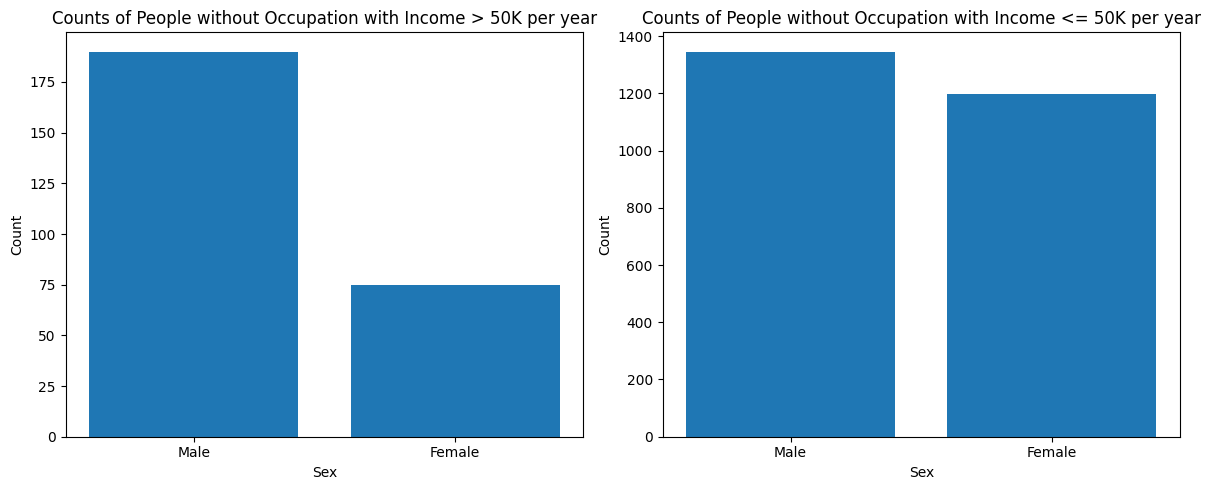

In [111]:
# Males and Females who doesn't have occupation record but but the income per year > 50k plot
high_income_jobless_people = people_without_occupation[people_without_occupation['income-per-year'] == '>50K']

# Males and Females who doesn't have occupation record but but the income per year <= 50k plot
low_income_jobless_people  = people_without_occupation[people_without_occupation['income-per-year'] == '<=50K']


# Creating a subplot inorder to show them side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(['Male', 'Female'], high_income_jobless_people['sex'].value_counts())
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Count')
axes[0].set_title('Counts of People without Occupation with Income > 50K per year')


axes[1].bar(['Male', 'Female'], low_income_jobless_people['sex'].value_counts())
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Count')
axes[1].set_title('Counts of People without Occupation with Income <= 50K per year')

plt.tight_layout()
plt.show()

To above plot we can see that that some people earn more than 50k even they doesn't have any records about their occupation or the workclass. But there are some people who doesn't have occupation as well as doesn't earn 50k per year. Therefore first let's get rid of them values. We can fill those values with none but we cannot completely sure that these people doesn't have any occupation or maybe the records of their occupations did not saved. Therefore dropping them is the best solution.

#### Dropping the rows which doesnt have any records of the occupation as well as  with the income <= 50K

In [112]:
adult_dataset = adult_dataset.drop(adult_dataset[(adult_dataset['occupation'].isna()) & (adult_dataset['income-per-year'] == '<=50K')].index)

# Checking if we get rid of those values
adult_dataset[(adult_dataset['occupation'].isna()) & (adult_dataset['income-per-year'] == '<=50K')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per_week,native-country,income-per-year


Well We can see that those data points are completely gone. Lets consider the other values need to be handled.
1. People who doesn't have a occupation record and the year income is greater than 50K.
2. People who doesn't have a native-country record.

In [113]:
# Lets take the percentage of people who doesn't have occupation and earn more than 50k.
high_income_people  = adult_dataset[adult_dataset['income-per-year'] == '>50K']
high_income_jobless_people_percentage = (high_income_jobless_people['sex'].value_counts() / high_income_people['sex'].value_counts()) * 100
print(high_income_jobless_people_percentage)
print(f'total = {high_income_jobless_people_percentage.sum()}')

sex
 Male      1.916095
 Female    4.239683
Name: count, dtype: float64
total = 6.155778636647329


Its like 6.1 percent of the total number of records with the people who earn more than 50K per year. we cannot remove those values because the ratio between the earnings more than 50K is kind of large. Therefore Lets choose a method to fill those values practically and domain-wise acceptable.

Ways of filling the data.

1. Fill values with mode
2. Try building a prediction model to predict the occupation based on the given features.

In [114]:
# Mode of the occupations with people who have higher income.
mode_occupation_G50K = adult_dataset[adult_dataset['income-per-year'] == '>50K']['occupation'].mode()
print(mode_occupation_G50K)

# Other Occupation of other higher income people
print(adult_dataset[adult_dataset['income-per-year'] == '>50K']['occupation'])

0     Exec-managerial
Name: occupation, dtype: object
7         Exec-managerial
8          Prof-specialty
9         Exec-managerial
10        Exec-managerial
11         Prof-specialty
               ...       
48816      Prof-specialty
48817     Exec-managerial
48823      Prof-specialty
48827      Prof-specialty
48842     Exec-managerial
Name: occupation, Length: 11685, dtype: object


#### Filling the Occupation of higher income people based on occupation mode

In [115]:
# Filling the occupation data column
adult_dataset['occupation'].fillna(mode_occupation_G50K.values[0],inplace=True)

# Checking the not null count of the occupation now
adult_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46269 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              46269 non-null  object
 1   workclass        46004 non-null  object
 2   fnlwgt           46269 non-null  object
 3   education        46269 non-null  object
 4   education-num    46269 non-null  object
 5   marital-status   46269 non-null  object
 6   occupation       46269 non-null  object
 7   relationship     46269 non-null  object
 8   race             46269 non-null  object
 9   sex              46269 non-null  object
 10  capital-gain     46269 non-null  object
 11  capital-loss     46269 non-null  object
 12  hours-per_week   46269 non-null  object
 13  native-country   45453 non-null  object
 14  income-per-year  46269 non-null  object
dtypes: object(15)
memory usage: 5.6+ MB


You can see that now the occupation column is filled and ready to continue with the mode of the occupation of higher-income people __(>50K)__

#### Filling the workclass null values

Lets plot the most values in workclass for two categories.

Text(0.5, 1.0, 'Higher than 50K workclasses')

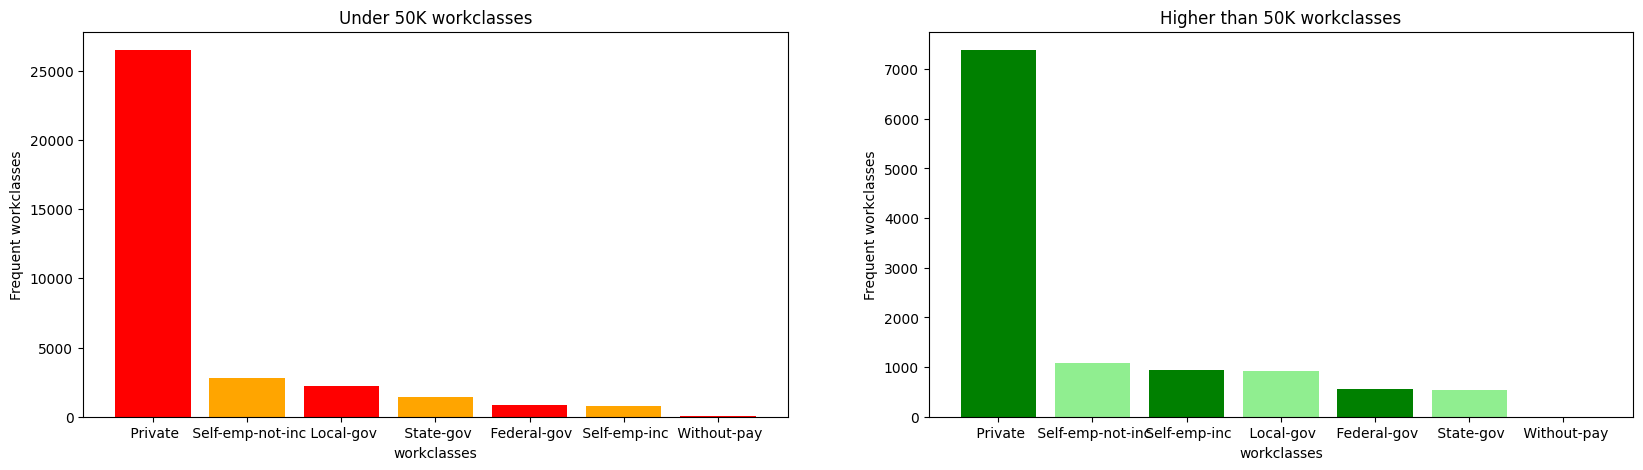

In [116]:
# Plotting null value count with under 50K and more than 50K
low_income_workclasses = adult_dataset[adult_dataset['income-per-year'] == '<=50K']['workclass'].value_counts()
high_income_workclasses = adult_dataset[adult_dataset['income-per-year'] == '>50K']['workclass'].value_counts()

#Custom colors for better definition
low_income_colors = ['red','orange']
high_income_colors = ['green','lightgreen']

# Plotting them side by side
fig, axes = plt.subplots(1,2, figsize = (20,5))

axes[0].bar(low_income_workclasses.index,low_income_workclasses.values,color=low_income_colors)
axes[0].set_xlabel("workclasses")
axes[0].set_ylabel("Frequent workclasses")
axes[0].set_title("Under 50K workclasses")


axes[1].bar(high_income_workclasses.index,high_income_workclasses.values,color=high_income_colors)
axes[1].set_xlabel("workclasses")
axes[1].set_ylabel("Frequent workclasses")
axes[1].set_title("Higher than 50K workclasses")

 You can see that in Income which is under 50K as well as higher than 50K has alot of people in private sector. So its suitable to fill both those sectors missing values by the mode which is __private sector__. But note that there are some people with ___Without-Pay___ in the under 50K workclasses which is a key-point to consider.

__Lets fill both missing values by Private sector__

In [117]:
# Filling the missing values of the workclass column in the dataset
workclass_mode = adult_dataset['workclass'].mode()
adult_dataset['workclass'].fillna(workclass_mode.values[0],inplace=True)

#Check to make sure that we filled those values
adult_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46269 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              46269 non-null  object
 1   workclass        46269 non-null  object
 2   fnlwgt           46269 non-null  object
 3   education        46269 non-null  object
 4   education-num    46269 non-null  object
 5   marital-status   46269 non-null  object
 6   occupation       46269 non-null  object
 7   relationship     46269 non-null  object
 8   race             46269 non-null  object
 9   sex              46269 non-null  object
 10  capital-gain     46269 non-null  object
 11  capital-loss     46269 non-null  object
 12  hours-per_week   46269 non-null  object
 13  native-country   45453 non-null  object
 14  income-per-year  46269 non-null  object
dtypes: object(15)
memory usage: 5.6+ MB


Now uou can see the workclass column also has been filled.

### Considering native country column

There are 856 missing values in the native country.

In [118]:
#Value count of the native country seperately low_income and high_income
low_income_native_countries = adult_dataset[adult_dataset['income-per-year'] == '<=50K']['native-country'].value_counts()
high_income_native_countries = adult_dataset[adult_dataset['income-per-year'] == '>50K']['native-country'].value_counts()

In [119]:
# Low income people country values
low_income_native_countries

native-country
 United-States                 30824
 Mexico                          852
 Philippines                     199
 Puerto-Rico                     155
 El-Salvador                     136
 Germany                         135
 Canada                          103
 Cuba                             99
 Dominican-Republic               92
 Jamaica                          89
 India                            85
 South                            83
 Guatemala                        81
 Columbia                         78
 China                            77
 Vietnam                          76
 England                          72
 Italy                            67
 Poland                           65
 Haiti                            60
 Japan                            58
 Portugal                         50
 Nicaragua                        45
 Peru                             41
 Ecuador                          37
 Iran                             34
 Greece                

In [120]:
# High income people native countries
high_income_native_countries

native-country
 United-States                 10692
 Philippines                      85
 Canada                           63
 India                            62
 Germany                          58
 Mexico                           47
 England                          47
 China                            36
 Cuba                             34
 Italy                            34
 Japan                            32
 Taiwan                           26
 Iran                             22
 South                            20
 Puerto-Rico                      20
 Greece                           18
 Poland                           17
 France                           16
 Jamaica                          15
 Portugal                         12
 El-Salvador                      11
 Ireland                          11
 Haiti                             9
 Cambodia                          9
 Yugoslavia                        8
 Hong                              8
 Vietnam               

Well you can see that this dataset msotly relies on United states data. so the most of the people who has higher income as well as lower income defnitelty US. Lets check the value count of the missing values with compare to the income. The Dataset is biased based on the current Data.

In [121]:
# Count missing values for higher income people (>50K)
missing_high_income = adult_dataset[adult_dataset["income-per-year"] == ">50K"]['native-country'].isna().sum()
print(f'Number of missing data rows (native country) for higher income people: {missing_high_income}')

# Count missing values for lower income people (<=50K)
missing_low_income = adult_dataset[adult_dataset["income-per-year"] == "<=50K"]['native-country'].isna().sum()
print(f'Number of missing data rows (native country) for lower income people: {missing_low_income}')

Number of missing data rows (native country) for higher income people: 220
Number of missing data rows (native country) for lower income people: 596


In order to make the dataset balance as well as correct. I'll Remove the native country missing values within people who earn under 50K per Year.

In [122]:
# Removing the Native Country missing data of the people
adult_dataset = adult_dataset.drop(adult_dataset[(adult_dataset['native-country'].isna()) & (adult_dataset['income-per-year'] == '<=50K')].index)

Let's Check the dropped data.

In [123]:
# Count missing values for higher income people (>50K)
missing_high_income = adult_dataset[adult_dataset["income-per-year"] == ">50K"]['native-country'].isna().sum()
print(f'Number of missing data rows (native country) for higher income people: {missing_high_income}')

# Count missing values for lower income people (<=50K)
missing_low_income = adult_dataset[adult_dataset["income-per-year"] == "<=50K"]['native-country'].isna().sum()
print(f'Number of missing data rows (native country) for lower income people: {missing_low_income}')

Number of missing data rows (native country) for higher income people: 220
Number of missing data rows (native country) for lower income people: 0


Now You can see that the native country missing records of the people who earn under 50K are completely gone. But This Dataset has biasness We cannot remove the native-country records of the people who earn more than 50K per month. Therefore we have to choose a method to fill those data. I think I'm going with mode to fill those data because the other country ratio is completely compares to others.

In [124]:
# Filling the Missing country records of the people who earn more than 50K per year
adult_dataset['native-country'].fillna(adult_dataset['native-country'].mode()[0], inplace=True)

Now Those values are filled with the mode.

In [125]:
# Count missing values for higher income people (>50K)
missing_high_income = adult_dataset[adult_dataset["income-per-year"] == ">50K"]['native-country'].isna().sum()
print(f'Number of missing data rows (native country) for higher income people: {missing_high_income}')

Number of missing data rows (native country) for higher income people: 0


Now We completely get rid of the missing values in the dataset. Every value is completed.

### Capital-Loss and Capital-Gain values fix

Let's find out how many 0 values in the capital-loss and capital-gain columns.

In [126]:
# Capital gain values
adult_dataset['capital-gain'].value_counts()

capital-gain
 0        41767
 15024      513
 7688       410
 7298       364
 99999      244
          ...  
 2387         1
 22040        1
 7262         1
 1731         1
 6612         1
Name: count, Length: 122, dtype: int64

<Axes: title={'center': 'Capital Gain Distribution in the dataset'}, xlabel='capital-gain', ylabel='Count'>

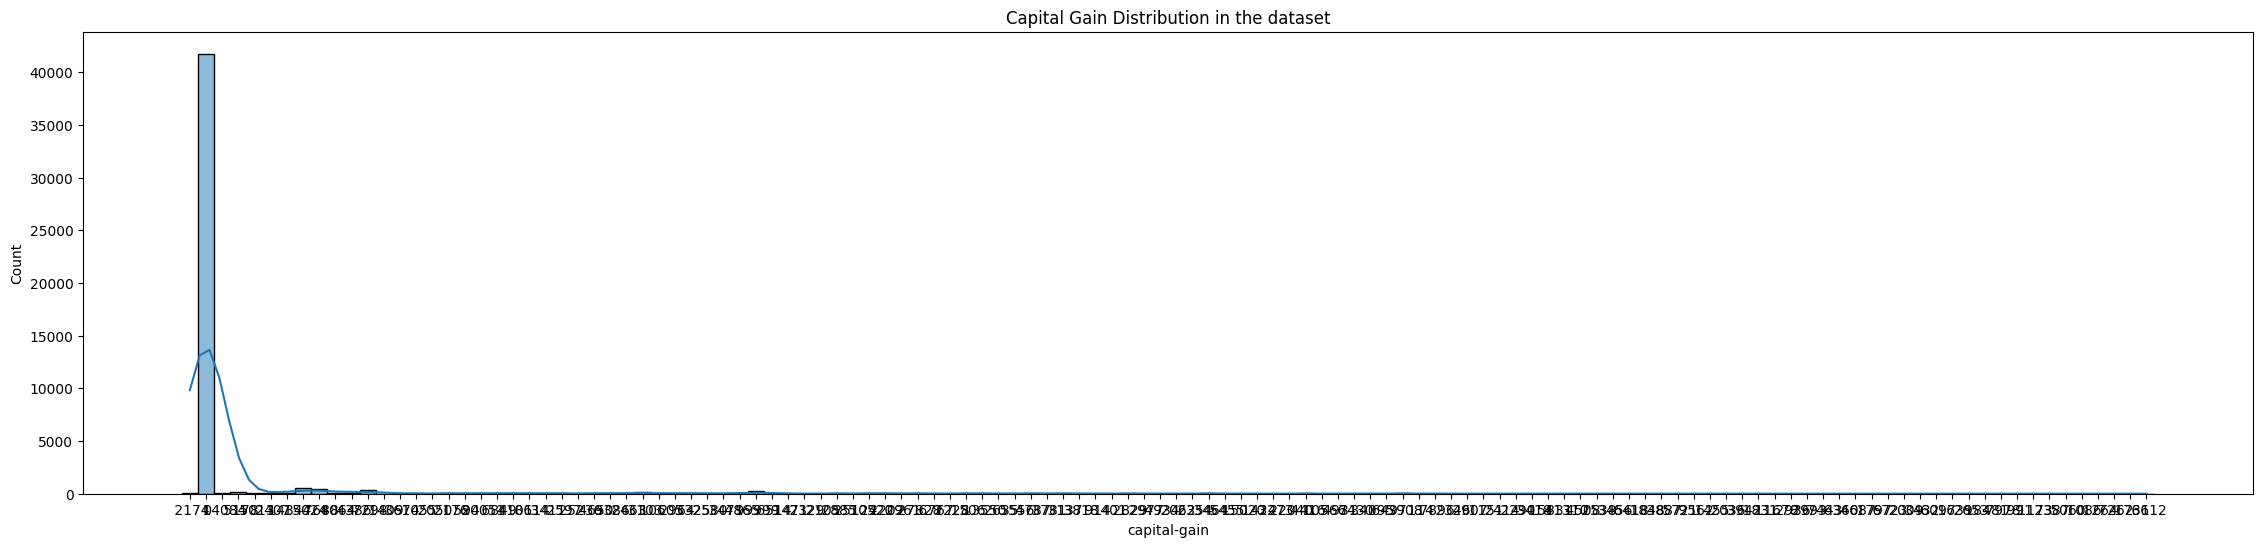

In [127]:
# Capital Gain Distribution
plt.figure(figsize=(28, 6))
plt.title("Capital Gain Distribution in the dataset")
sns.histplot(adult_dataset['capital-gain'],kde=True, label=column)

In [128]:
# Capital Loss values
adult_dataset['capital-loss'].value_counts()

capital-loss
 0       43487
 1902      304
 1977      253
 1887      233
 2415       72
         ...  
 155         1
 419         1
 2080        1
 4356        1
 2163        1
Name: count, Length: 97, dtype: int64

<Axes: title={'center': 'Capital Loss Distribution in the dataset'}, xlabel='capital-loss', ylabel='Count'>

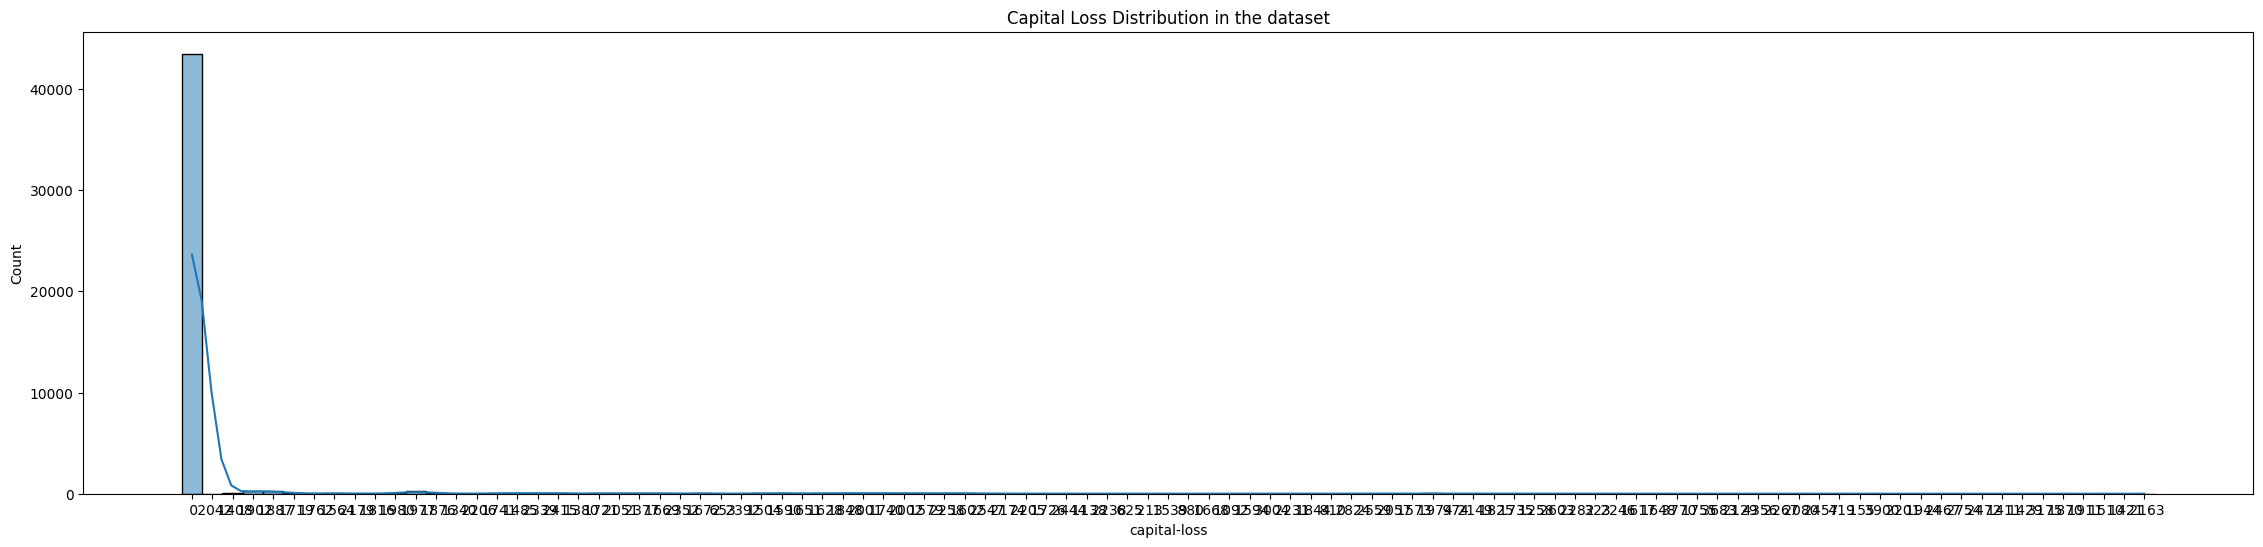

In [129]:
# Capital Loss Distribution
plt.figure(figsize=(28, 6))
plt.title("Capital Loss Distribution in the dataset")
sns.histplot(adult_dataset['capital-loss'],kde=True, label=column)

you can There are lots of 0 values in both capital-loss and capital-gains which is this dataset poorly performs under the models. Therefore gets rid of them.

Let's See the Current Status of the Dataset After filling missing values, removing duplicates and unecessary values.

#### Data Type Conversion

You can see that the every datatype of each feature are object data type. Therefore we need to convert each data type to its thier correct data type. According to the adult.names there are 6 Continuous data columns.

1. age
2. fnlwgt
3. education-num
4. capital-gain
5. capital-loss
6. hours-per-week

We can analyze that there are no decimal type numerical data therefore lets convert all of them to integer type data.

In [130]:
# Converting the Data type of continous data to integer
adult_dataset['age']            = adult_dataset['age'].astype(int)
adult_dataset['fnlwgt']         = adult_dataset['fnlwgt'].astype(int)
adult_dataset['education-num']  = adult_dataset['education-num'].astype(int)
adult_dataset['capital-gain']   = adult_dataset['capital-gain'].astype(int)
adult_dataset['capital-loss']   = adult_dataset['capital-loss'].astype(int)
adult_dataset['hours-per_week'] = adult_dataset['hours-per_week'].astype(int)

In [131]:
adult_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45673 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45673 non-null  int32 
 1   workclass        45673 non-null  object
 2   fnlwgt           45673 non-null  int32 
 3   education        45673 non-null  object
 4   education-num    45673 non-null  int32 
 5   marital-status   45673 non-null  object
 6   occupation       45673 non-null  object
 7   relationship     45673 non-null  object
 8   race             45673 non-null  object
 9   sex              45673 non-null  object
 10  capital-gain     45673 non-null  int32 
 11  capital-loss     45673 non-null  int32 
 12  hours-per_week   45673 non-null  int32 
 13  native-country   45673 non-null  object
 14  income-per-year  45673 non-null  object
dtypes: int32(6), object(9)
memory usage: 4.5+ MB


Now all the continuous data has been converted to integer.

### Statistics after Basic Pre-Processing

In [132]:
# Basic Info of the Dataset
adult_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45673 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45673 non-null  int32 
 1   workclass        45673 non-null  object
 2   fnlwgt           45673 non-null  int32 
 3   education        45673 non-null  object
 4   education-num    45673 non-null  int32 
 5   marital-status   45673 non-null  object
 6   occupation       45673 non-null  object
 7   relationship     45673 non-null  object
 8   race             45673 non-null  object
 9   sex              45673 non-null  object
 10  capital-gain     45673 non-null  int32 
 11  capital-loss     45673 non-null  int32 
 12  hours-per_week   45673 non-null  int32 
 13  native-country   45673 non-null  object
 14  income-per-year  45673 non-null  object
dtypes: int32(6), object(9)
memory usage: 4.5+ MB


You can see that there are no missing values and the dataset is completely filled with the data records 0f 30,472

In [133]:
# Basic Satistical Details of the Data
adult_dataset.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per_week
count,45673.000000,4.567300e+04,45673.000000,45673.000000,45673.000000,45673.000000
mean,38.677818,1.897424e+05,10.135726,1145.327327,89.760515,40.930221
std,13.273332,1.055957e+05,2.558878,7697.068614,407.845402,12.049168
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.174760e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782510e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.378680e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#### Value Distributions of Each Feature

In [134]:
adult_dataset.age.value_counts()

age
36    1293
35    1288
33    1282
31    1280
34    1248
      ... 
88       5
85       5
86       1
89       1
87       1
Name: count, Length: 74, dtype: int64

#### Age Distribution

<Axes: title={'center': 'Age Distribution in the dataset'}, xlabel='age', ylabel='Count'>

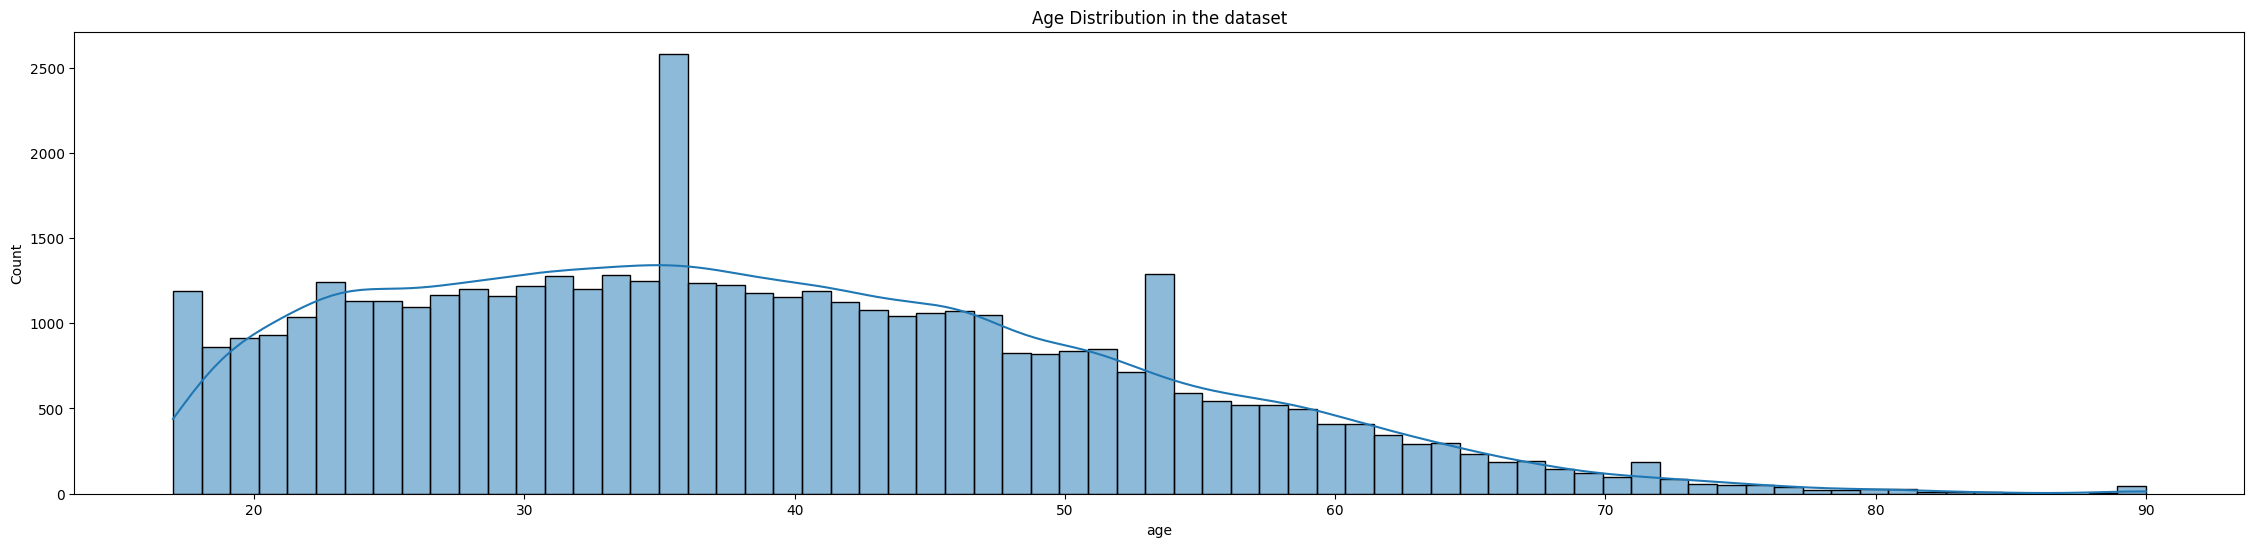

In [135]:
# Age value count
sorted_ages = adult_dataset['age'].sort_values()
plt.figure(figsize=(28, 6))
plt.title("Age Distribution in the dataset")
sns.histplot(sorted_ages, kde=True, label=column)


#### Workclass Distribution

<Axes: title={'center': 'Workclass Distribution in the dataset'}, xlabel='workclass', ylabel='Count'>

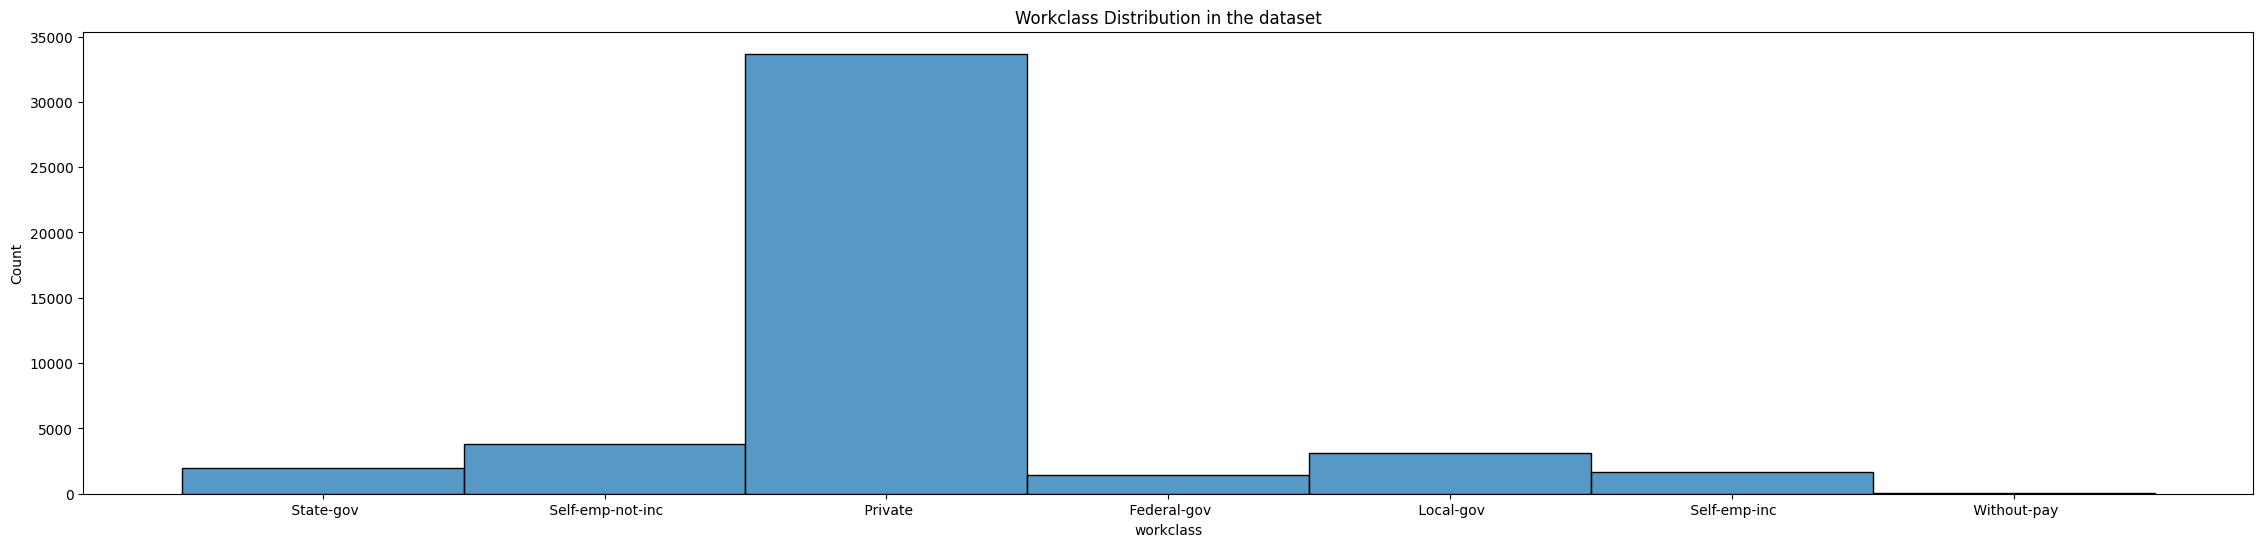

In [136]:
# Workclass Distribution
plt.figure(figsize=(28, 6))
plt.title("Workclass Distribution in the dataset")
sns.histplot(adult_dataset.workclass,label=column)

#### fnlwgt Distribution

<Axes: title={'center': 'fnlwgt Distribution in the dataset'}, xlabel='fnlwgt', ylabel='Count'>

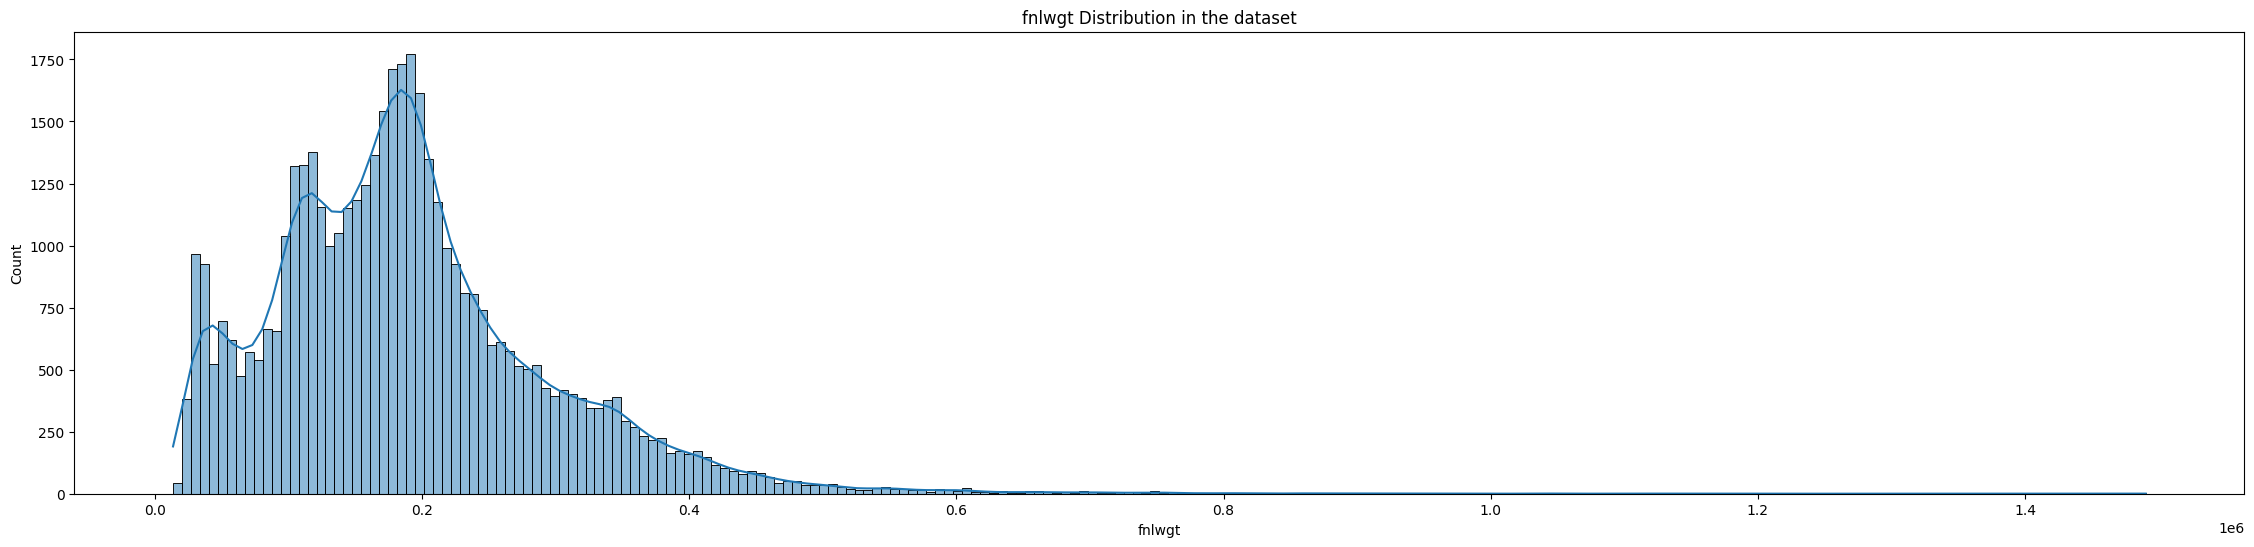

In [137]:
# fnlwgt Distribution
plt.figure(figsize=(28, 6))
plt.title("fnlwgt Distribution in the dataset")
sns.histplot(adult_dataset['fnlwgt'], kde=True, label=column)


#### Education and Education Number Distribution

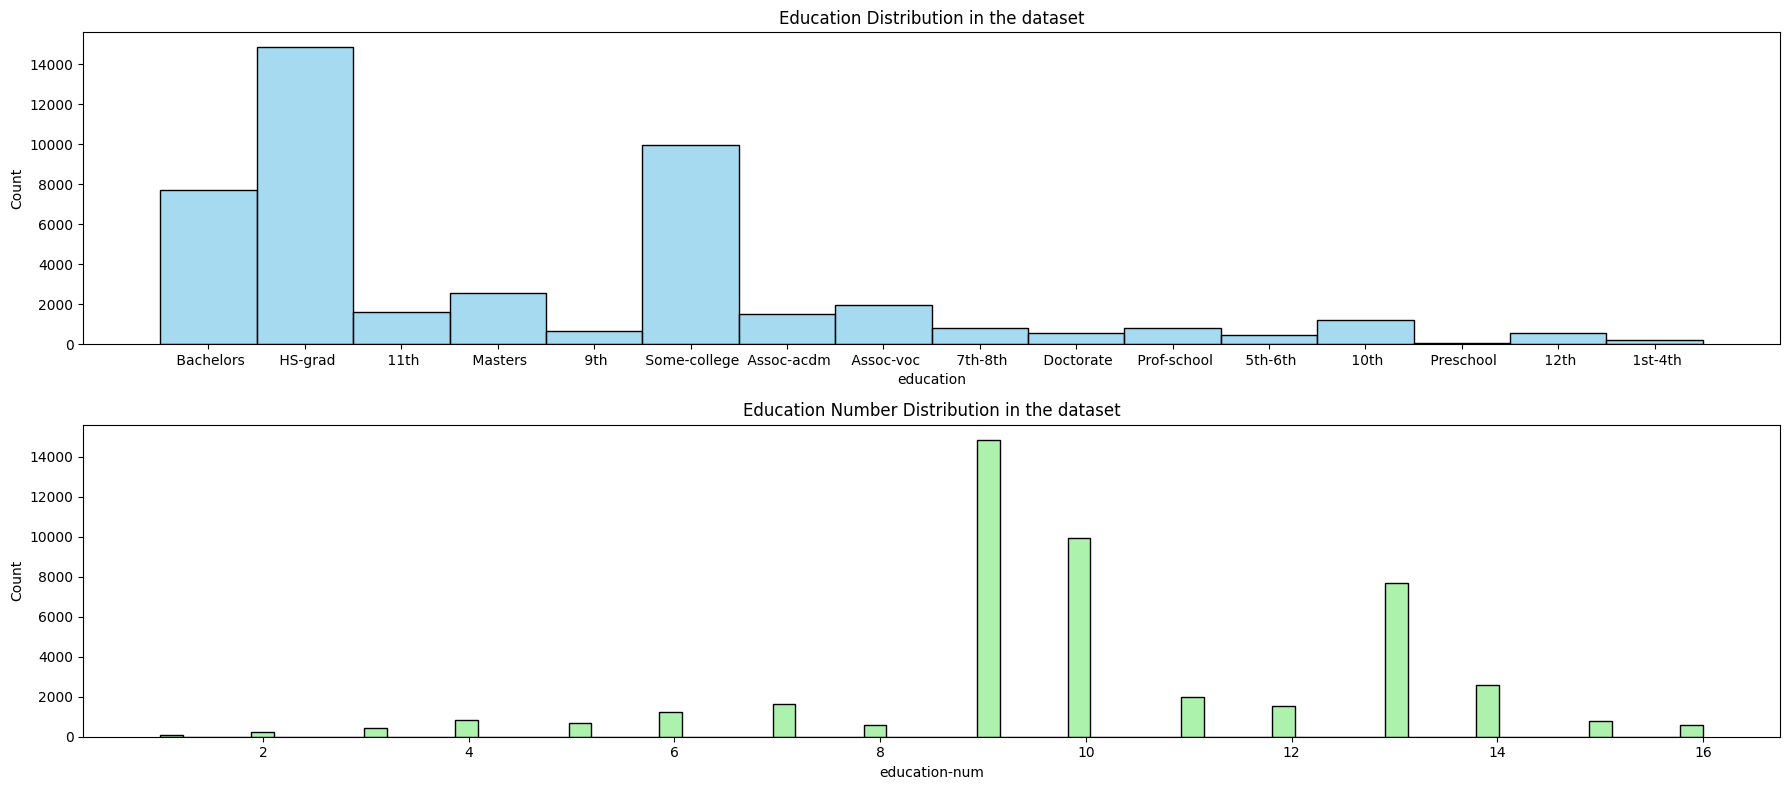

In [138]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(18, 8))

# Plot Education Distribution
sns.histplot(ax=axes[0], data=adult_dataset['education'], label='Education', color='skyblue')
axes[0].set_title('Education Distribution in the dataset')

# Plot Education Number Distribution
sns.histplot(ax=axes[1], data=adult_dataset['education-num'], label='Education Number', color='lightgreen')
axes[1].set_title('Education Number Distribution in the dataset')

# Show the plot
plt.tight_layout()
plt.show()

#### Marital Status Distribution

<Axes: title={'center': 'Marital Status Distribution in the dataset'}, xlabel='marital-status', ylabel='Count'>

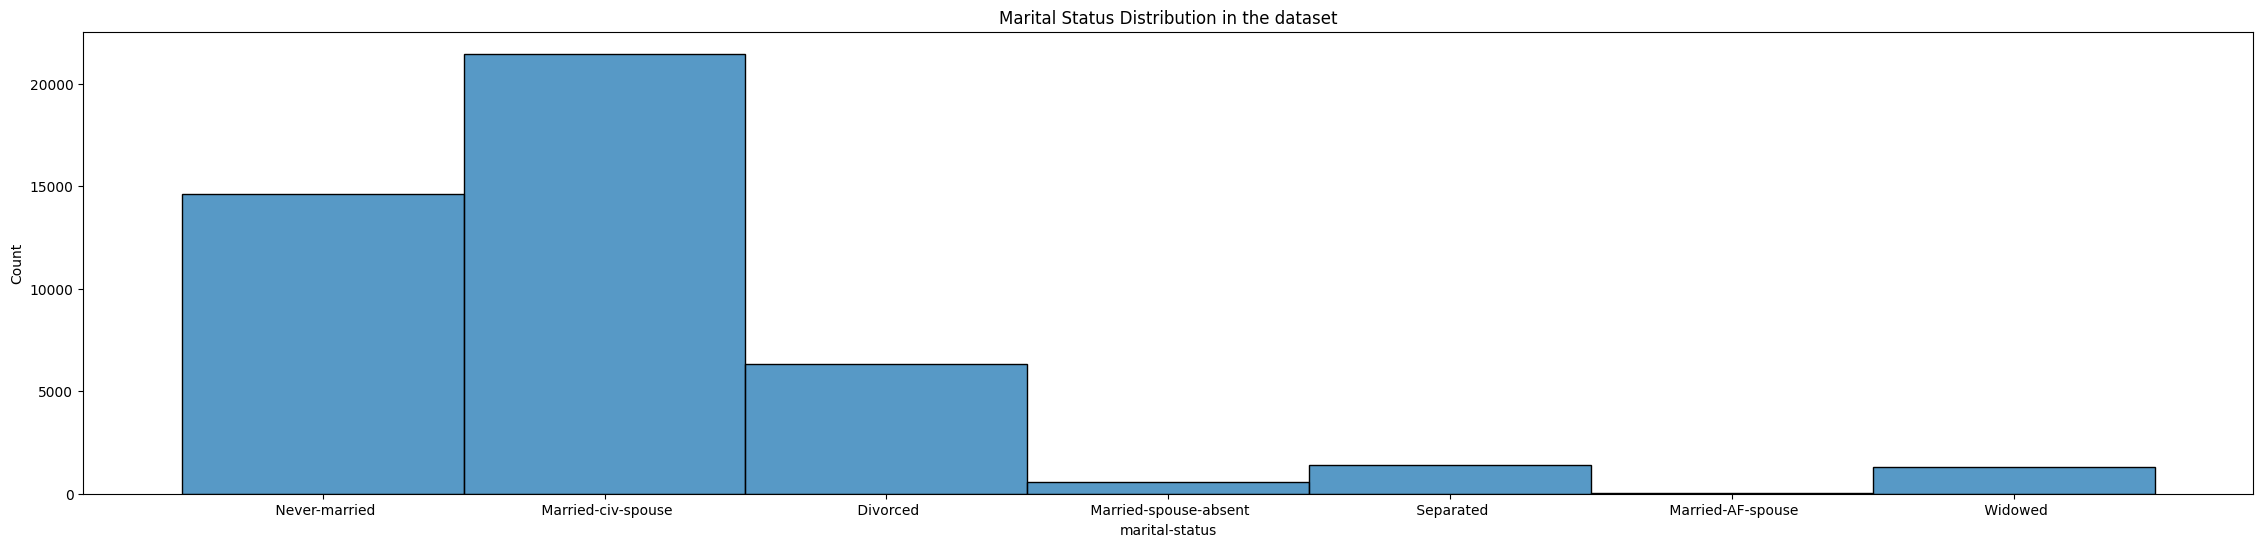

In [139]:
# Marital Status Distribution
plt.figure(figsize=(28, 6))
plt.title("Marital Status Distribution in the dataset")
sns.histplot(adult_dataset['marital-status'], label=column)

#### Occupation Distribution

<Axes: title={'center': 'Occupation Distribution in the dataset'}, xlabel='occupation', ylabel='Count'>

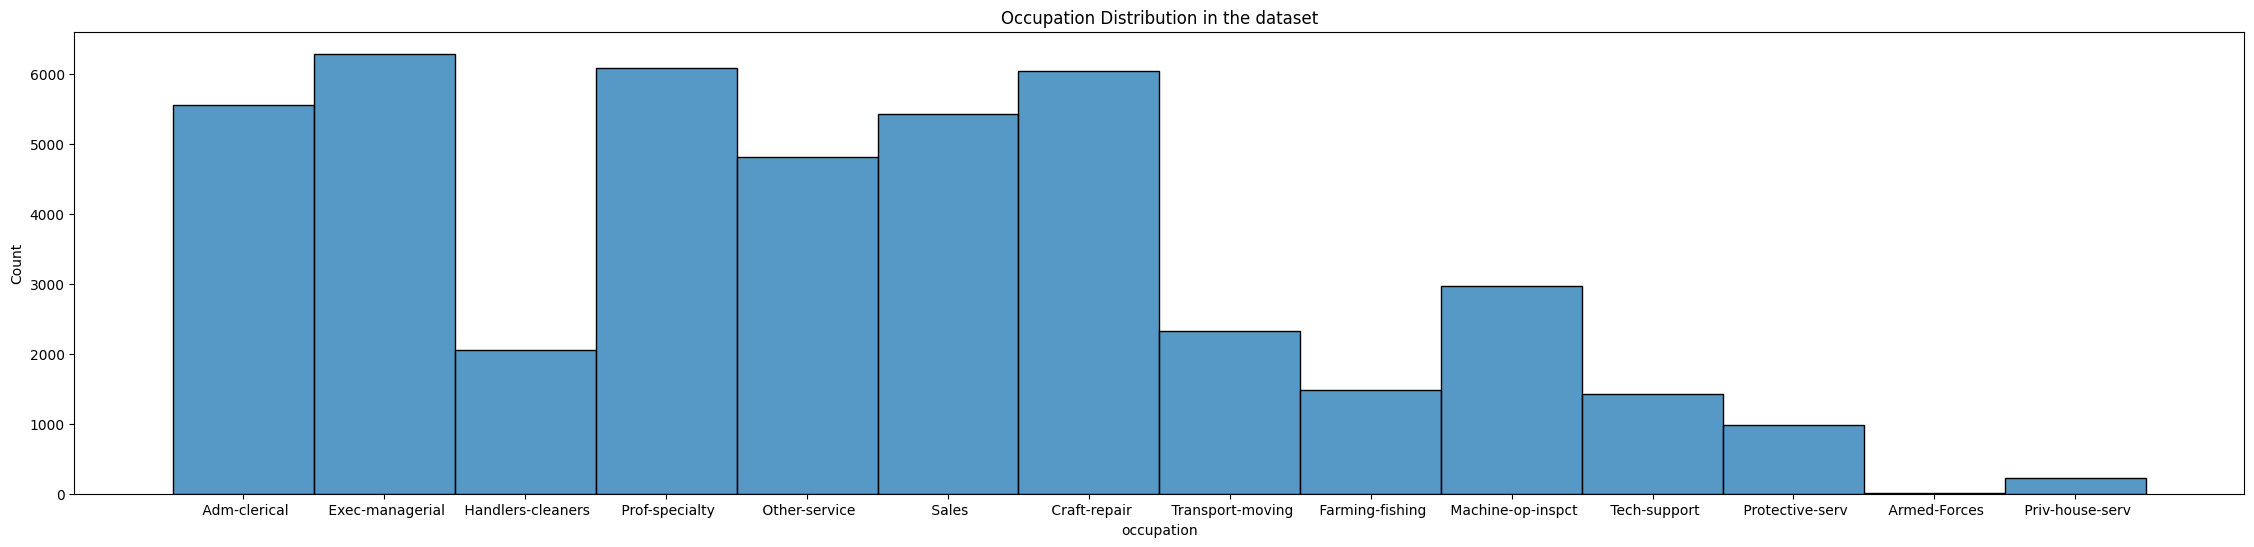

In [140]:
# Occupation Distribution
plt.figure(figsize=(28, 6))
plt.title("Occupation Distribution in the dataset")
sns.histplot(adult_dataset['occupation'], label=column)


#### Relationship Distribution

<Axes: title={'center': 'Relationship Distribution in the dataset'}, xlabel='relationship', ylabel='Count'>

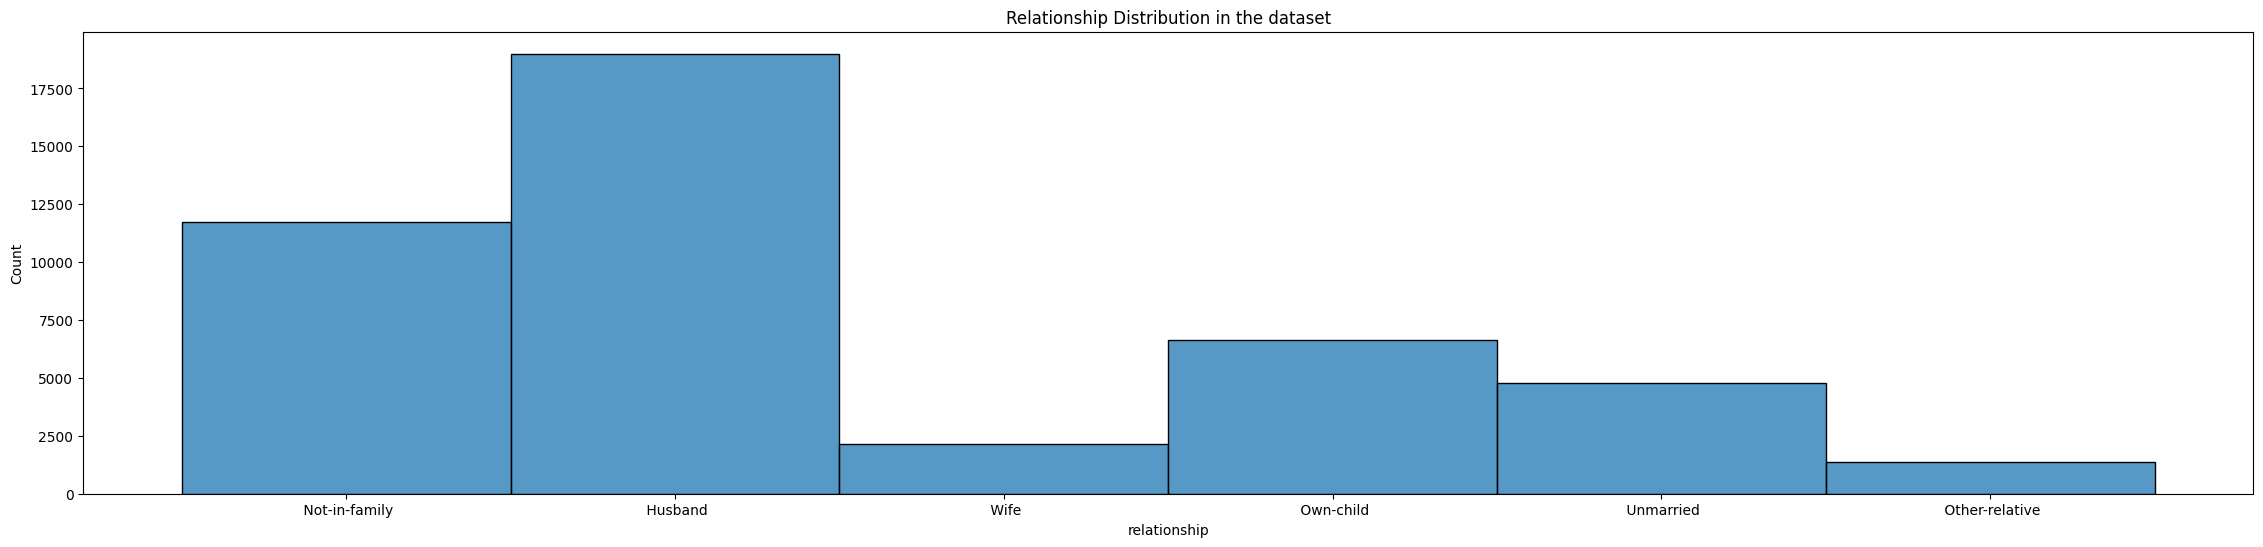

In [141]:
# Relationship Distribution
plt.figure(figsize=(28, 6))
plt.title("Relationship Distribution in the dataset")
sns.histplot(adult_dataset['relationship'], label=column)


#### Race Distribution

<Axes: title={'center': 'Race Distribution in the dataset'}, xlabel='race', ylabel='Count'>

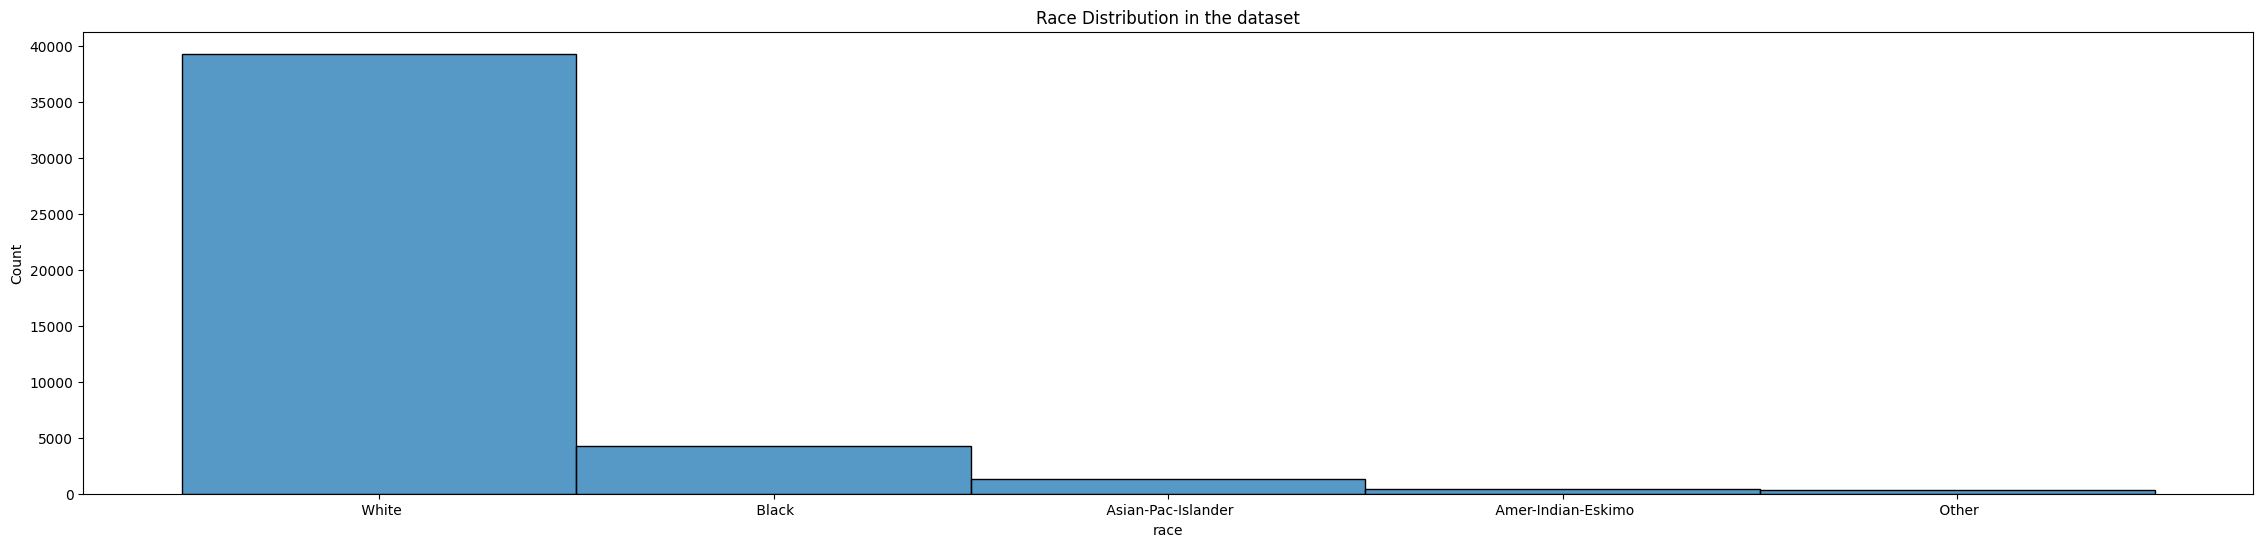

In [142]:
# Race Distribution
plt.figure(figsize=(28, 6))
plt.title("Race Distribution in the dataset")
sns.histplot(adult_dataset['race'], label=column)


#### Sex Distribution

<Axes: title={'center': 'Sex Distribution in the dataset'}, xlabel='sex', ylabel='Count'>

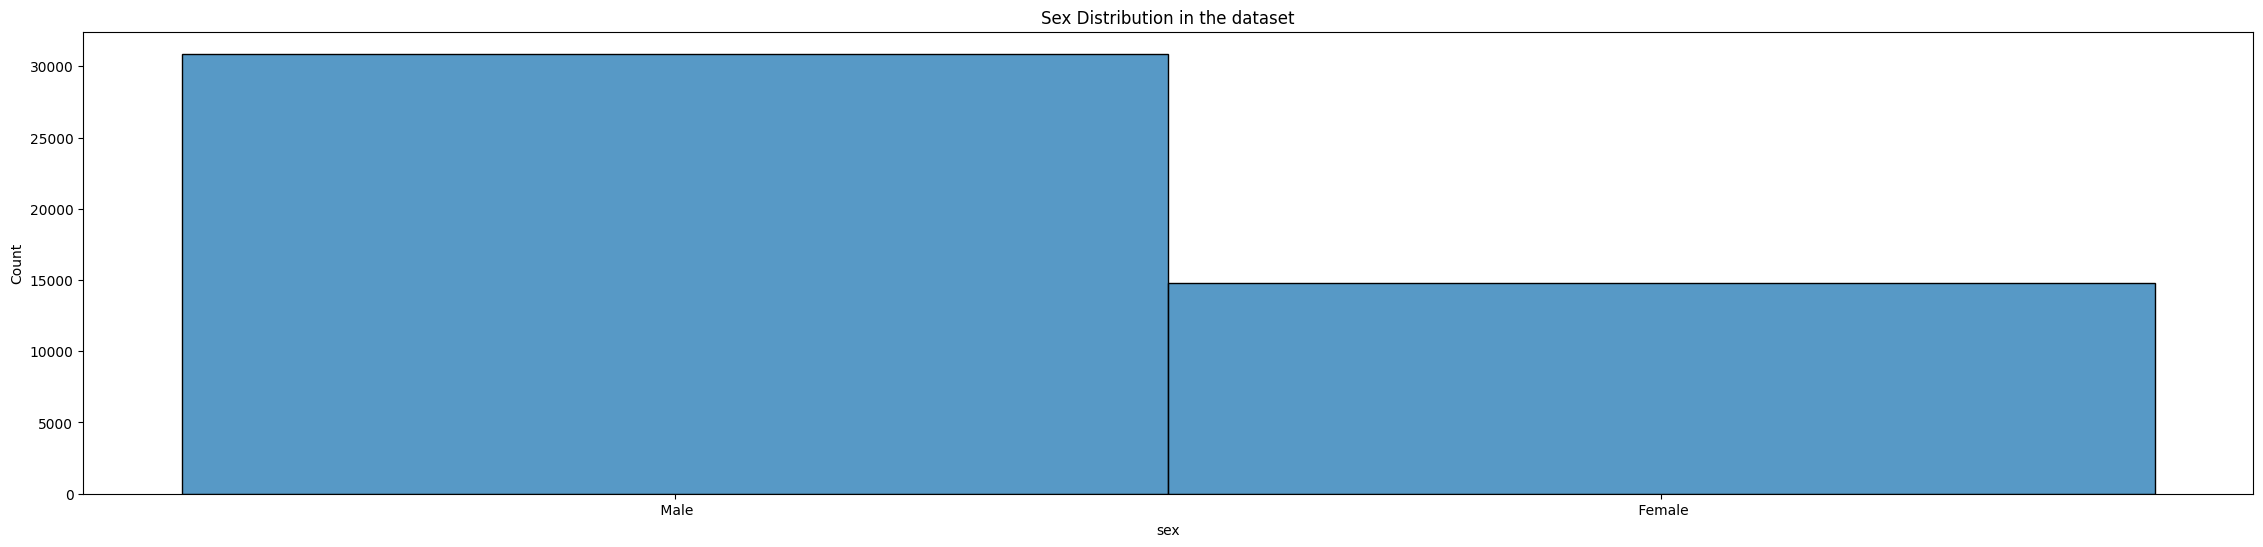

In [143]:
# Sex Distribution
plt.figure(figsize=(28, 6))
plt.title("Sex Distribution in the dataset")
sns.histplot(adult_dataset['sex'], label=column)

#### Capital Gain Distribution

<Axes: title={'center': 'Capital Gain Distribution in the dataset'}, xlabel='capital-gain', ylabel='Count'>

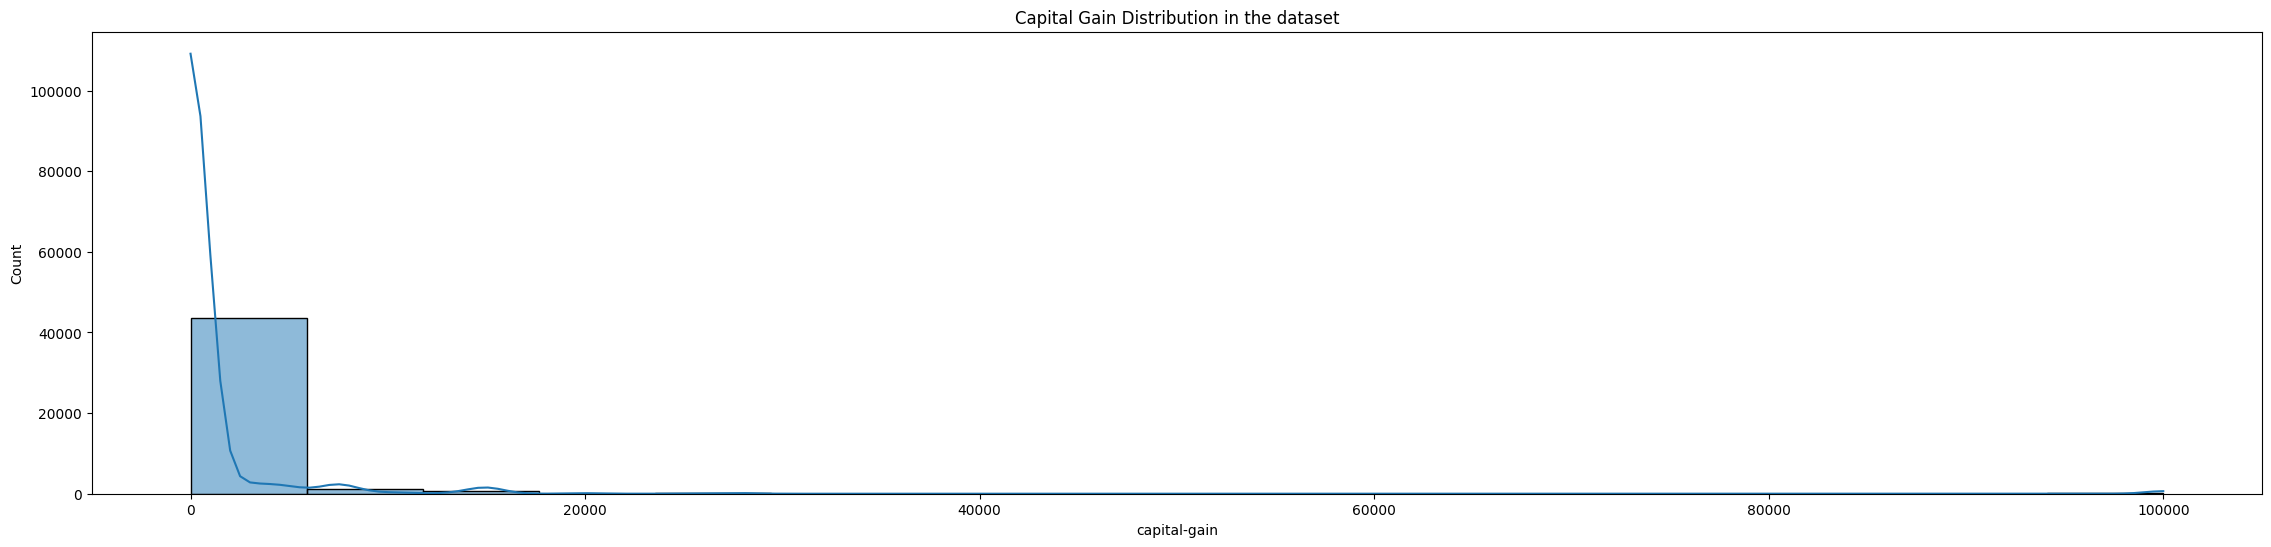

In [144]:
# Capital Gain Distribution
plt.figure(figsize=(28, 6))
plt.title("Capital Gain Distribution in the dataset")
sns.histplot(adult_dataset['capital-gain'],kde=True, label=column)

#### Capital Loss Distribution

<Axes: title={'center': 'Capital Gain Distribution in the dataset'}, xlabel='capital-loss', ylabel='Count'>

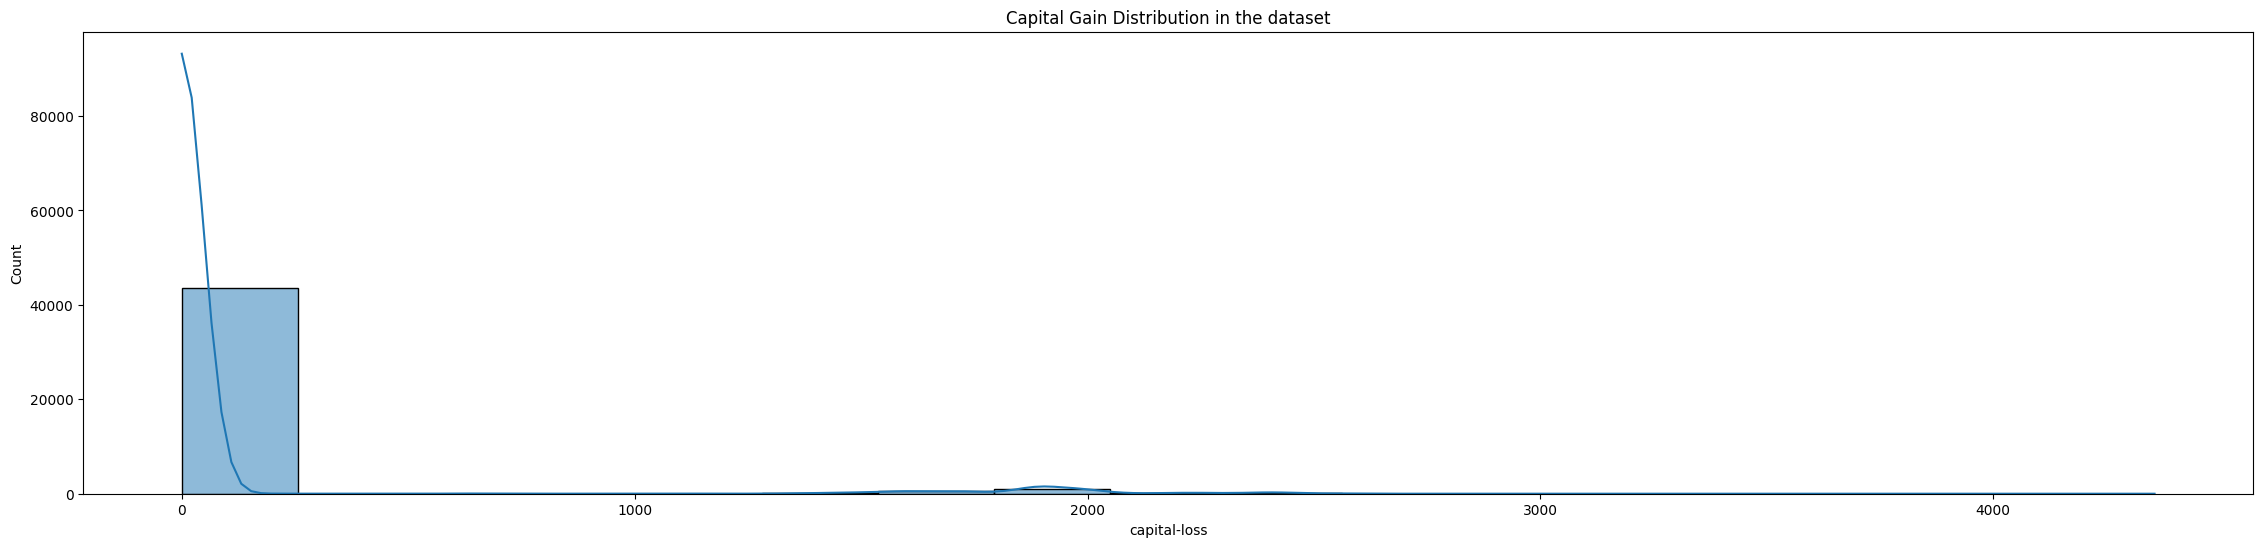

In [145]:
# Capital Loss Distribution
plt.figure(figsize=(28, 6))
plt.title("Capital Gain Distribution in the dataset")
sns.histplot(adult_dataset['capital-loss'],kde=True, label=column)

#### Work Hours per Week Distribution

<Axes: title={'center': 'Work Hours Distribution in the dataset'}, xlabel='hours-per_week', ylabel='Count'>

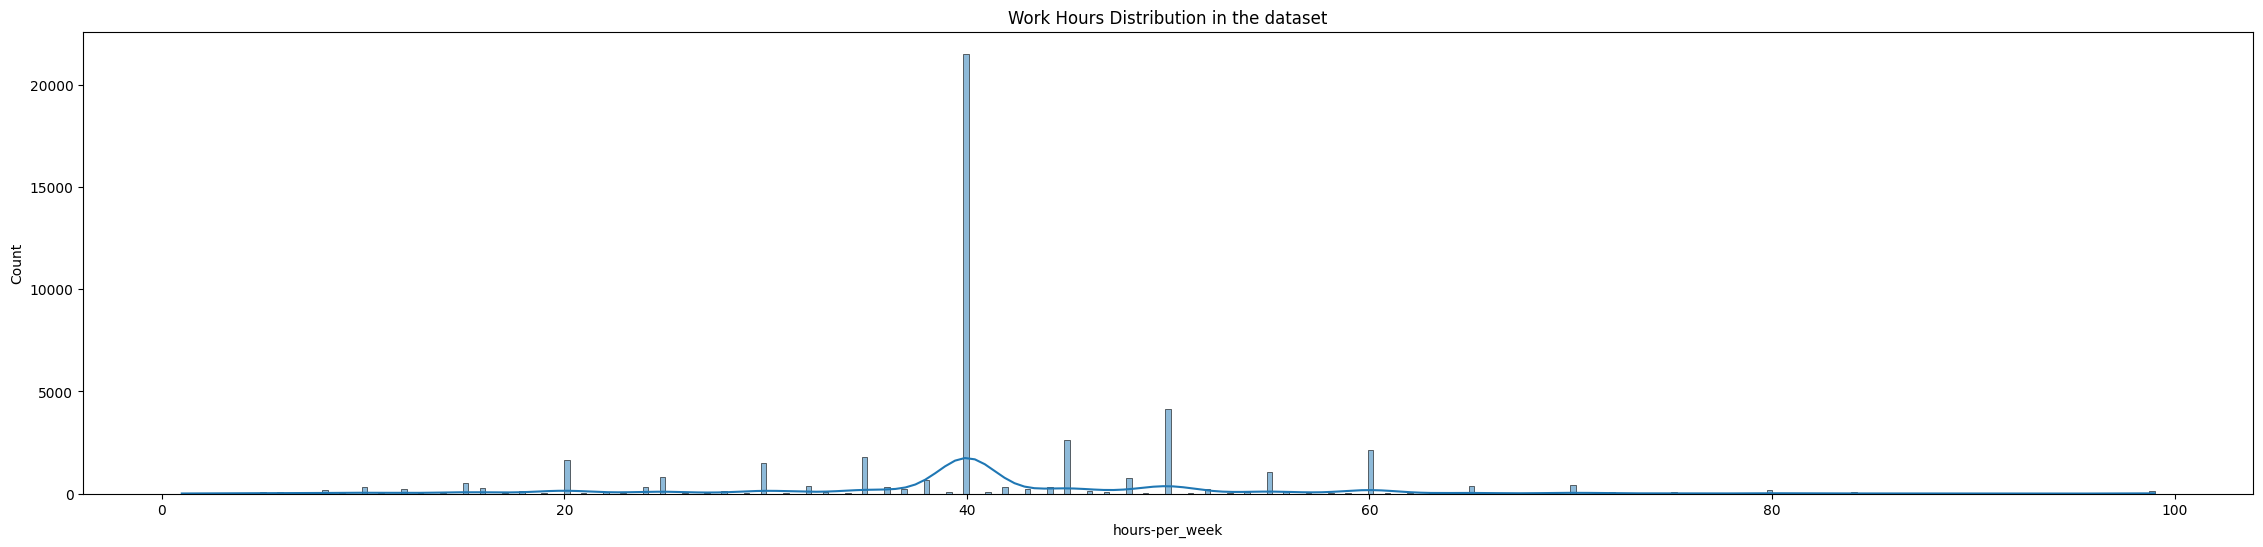

In [146]:
# Work Hours Distribution
plt.figure(figsize=(28, 6))
plt.title("Work Hours Distribution in the dataset")
sns.histplot(adult_dataset['hours-per_week'],kde=True, label=column)

#### Native Country Distribution

<Axes: title={'center': 'Native Country Distribution in the dataset'}, xlabel='native-country', ylabel='Count'>

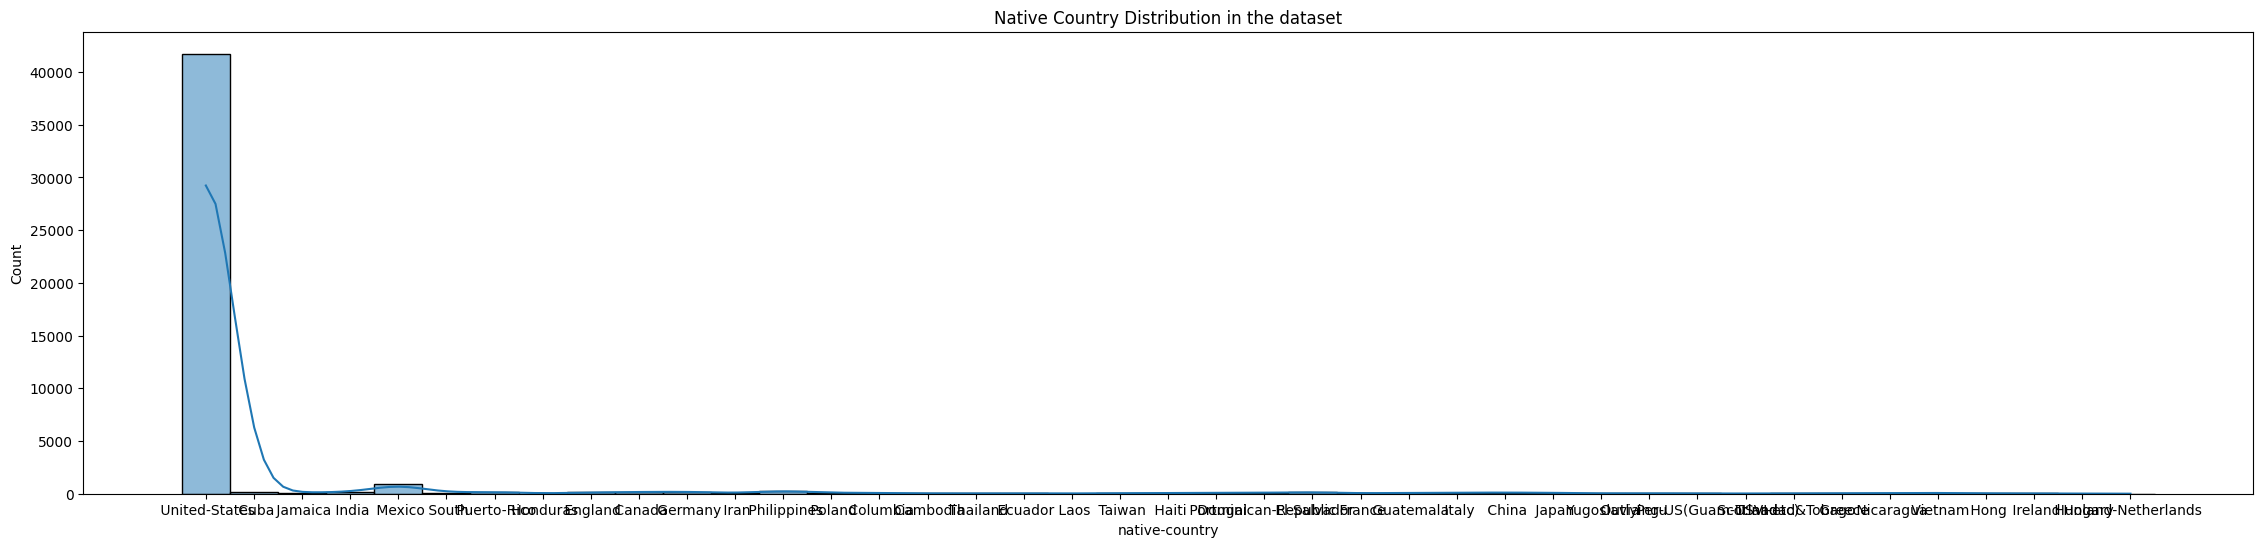

In [147]:
# Native Country Distribution
plt.figure(figsize=(28, 6))
plt.title("Native Country Distribution in the dataset")
sns.histplot(adult_dataset['native-country'],kde=True, label=column)

After Seeing the distributions of the dataset, we can observe that thsese Feautures are heavily biased. Therefore we need to reduce the biasness of the datset.

Techniques that can be used to reduce biasness

1. Normalize or standardize numerical features
2. Feature Selection/Engineering
3. Model Interpretability
4. Regularization
5. Cross-Validation

Before Normalizing the data we need to handle outliers. Lets handle the outliers in the dataset.

## Outliers Handling

Boxplotting Continuous data to find outliers.

### Age Outliers

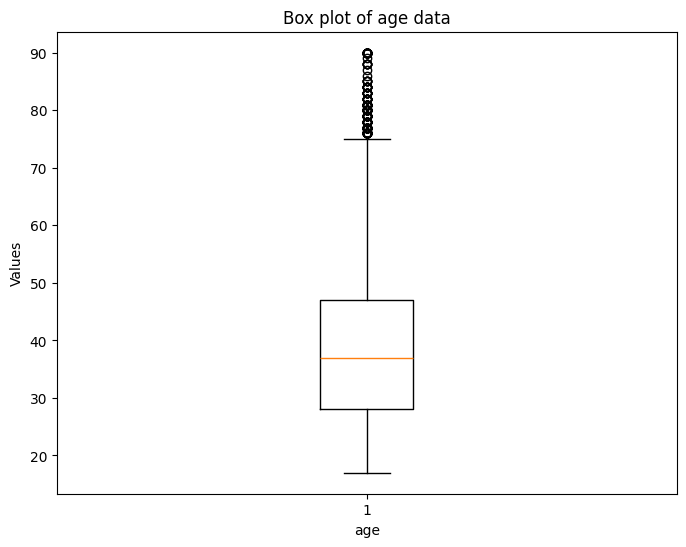

In [148]:
# Create a box plot for age feature
plt.figure(figsize=(8, 6))
plt.boxplot(adult_dataset['age'])
plt.title('Box plot of age data')
plt.xlabel('age')
plt.ylabel('Values')
plt.show()

In [149]:
# Upper Bound of the Dataset

# Calculate Q1, Q3, and IQR
Q1 = adult_dataset['age'].quantile(0.25)
Q3 = adult_dataset['age'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker value
upper_whisker = Q3 + 1.5 * IQR

# Find the highest data point within the upper whisker range
upper_bound_data = adult_dataset['age'][adult_dataset['age'] <= upper_whisker].max()

print("Upper bound within the boxplot:", upper_bound_data)


Upper bound within the boxplot: 75


You can see There are several outliers above the upperbound Before removing the Outliers we need to visualize are they really outliers.
Lets First Visualize how many people above the age 75 earn 50K or not.

people who earn more than 50k and above the age 75:- 72
people who earn below 50k and above the age 75:- 261


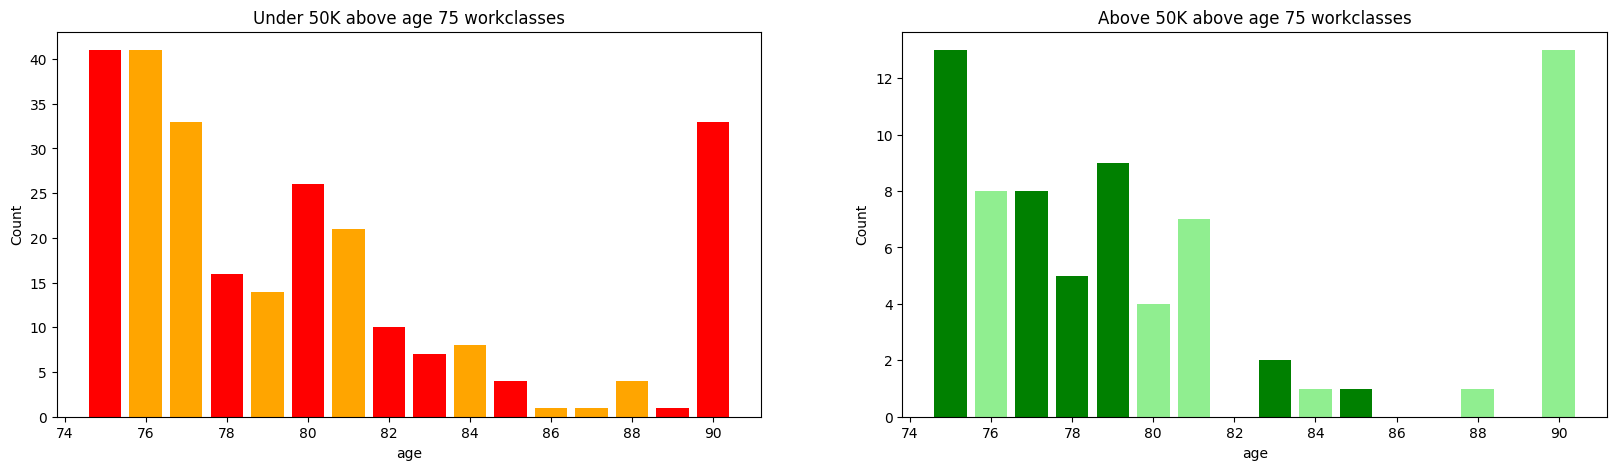

In [150]:
# Visualizing the Data of people above the age 75
above75_50k_earn = adult_dataset[(adult_dataset['age'] >= 75) & (adult_dataset['income-per-year'] == '>50K')]['age'].value_counts()
above75_50k_Nearn = adult_dataset[(adult_dataset['age'] >= 75) & (adult_dataset['income-per-year'] == '<=50K')]['age'].value_counts()


# Plotting those values in a bar chart

#Custom colors for better definition
Nearn50k = ['red','orange']
earn50k = ['green','lightgreen']

# Plotting them side by side
fig, axes = plt.subplots(1,2, figsize = (20,5))

axes[0].bar(above75_50k_Nearn.index,above75_50k_Nearn.values,color=Nearn50k)
axes[0].set_xlabel("age")
axes[0].set_ylabel("Count")
axes[0].set_title("Under 50K above age 75 workclasses")

axes[1].bar(above75_50k_earn.index,above75_50k_earn.values,color=earn50k)
axes[1].set_xlabel("age")
axes[1].set_ylabel("Count")
axes[1].set_title("Above 50K above age 75 workclasses")

print(f'people who earn more than 50k and above the age 75:- {above75_50k_earn.sum()}')
print(f'people who earn below 50k and above the age 75:- {above75_50k_Nearn.sum()}')


<Axes: title={'center': 'people who earn less than 50k thorught out the ages'}, xlabel='age', ylabel='Count'>

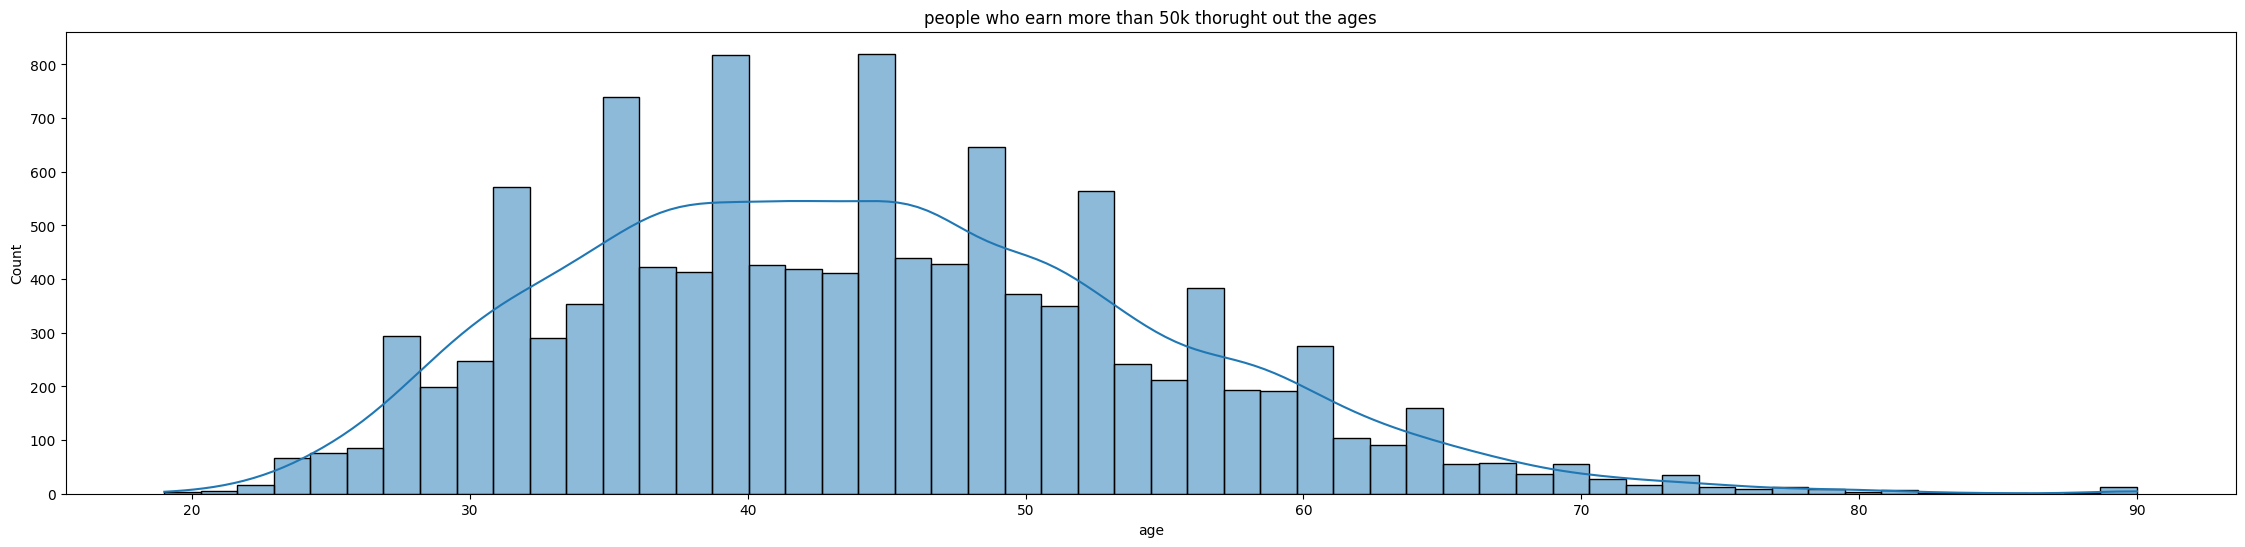

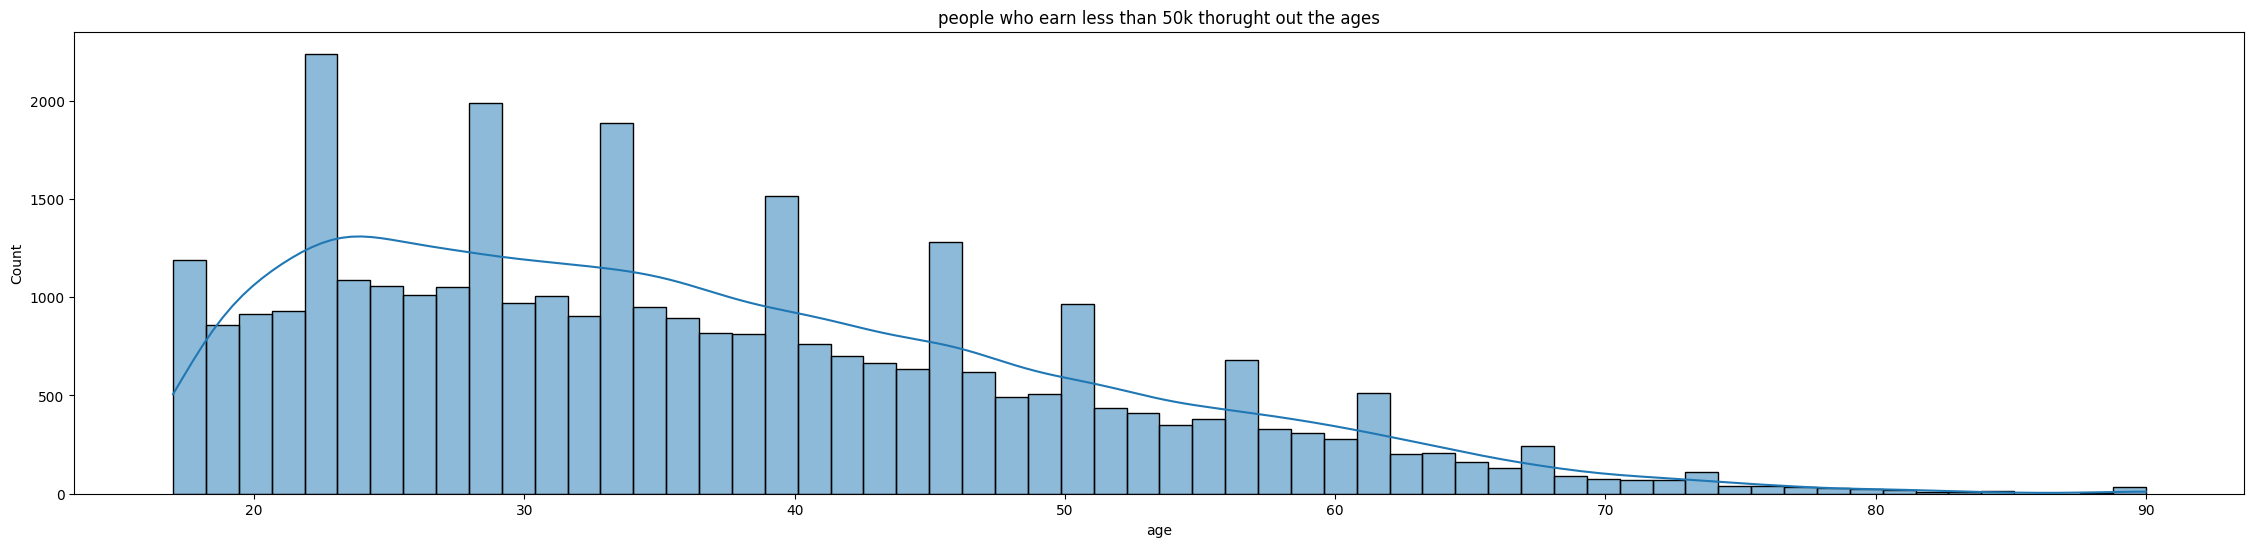

In [151]:
# Lets check the how people will earn thorught out the aging with KDE (Kernal Density Estimation)
above50k_earn = adult_dataset[adult_dataset['income-per-year'] == '>50K']['age']
plt.figure(figsize=(28, 6))
plt.title("people who earn more than 50k thorught out the ages")
sns.histplot(above50k_earn,kde=True, label=column)

below50k_earn = adult_dataset[adult_dataset['income-per-year'] == '<=50K']['age']
plt.figure(figsize=(28, 6))
plt.title("people who earn less than 50k thorught out the ages")
sns.histplot(below50k_earn,kde=True, label=column)

Analyzing both graphs we can see that the people who earn more than 50k is somewhat similar to normal distribution. But when it comes to people who earn less than 50k there are a huge decreasing when it comes to aging. We can analyze that people have a possibility to earn more than 50K when it comes to aging thats why there is a huge decreasing. People will earn money throught out their life therefore people who earn under 50k are really low in older people. (Of course there is a inbalance in the dataset therefore its still highter than the records of the people who earn more than 50k). But we can come to conclusion that this feature will help to understand the model that this trend in life. But on the other hand people who earn more than 50K doesn't really show any speciality therefore we can remove them as a outliers. Let's see what we can do about the other people who earn less than 50K.

In [152]:
# Let's Normalize the People who earn less than 50K throughout the ages by removing the outliers and plot 
adult_dataset = adult_dataset.drop(adult_dataset[(adult_dataset['age'] >= 75) & (adult_dataset['income-per-year'] == '<=50K')].index)

Let's see the plot again to see how the distribution looks like and let's see how this affects the entire performance of the model.

<Axes: title={'center': 'people who earn less than 50k thorught out the ages'}, xlabel='age', ylabel='Count'>

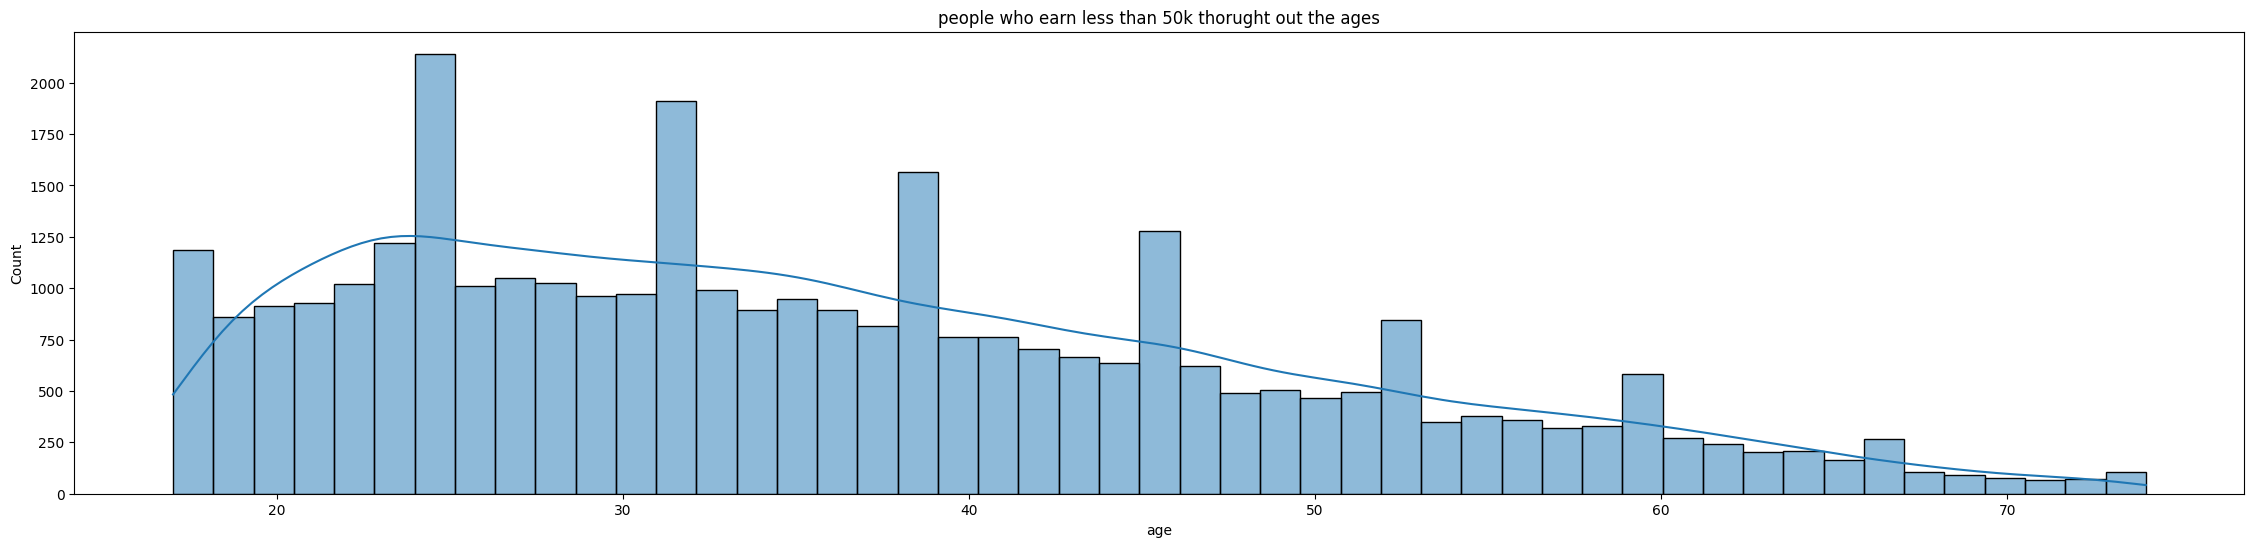

In [153]:
# Distribution
below50k_earn = adult_dataset[adult_dataset['income-per-year'] == '<=50K']['age']
plt.figure(figsize=(28, 6))
plt.title("people who earn less than 50k thorught out the ages")
sns.histplot(below50k_earn,kde=True, label=column)

<Axes: title={'center': 'people who earn more than 50k thorught out the ages'}, xlabel='age', ylabel='Count'>

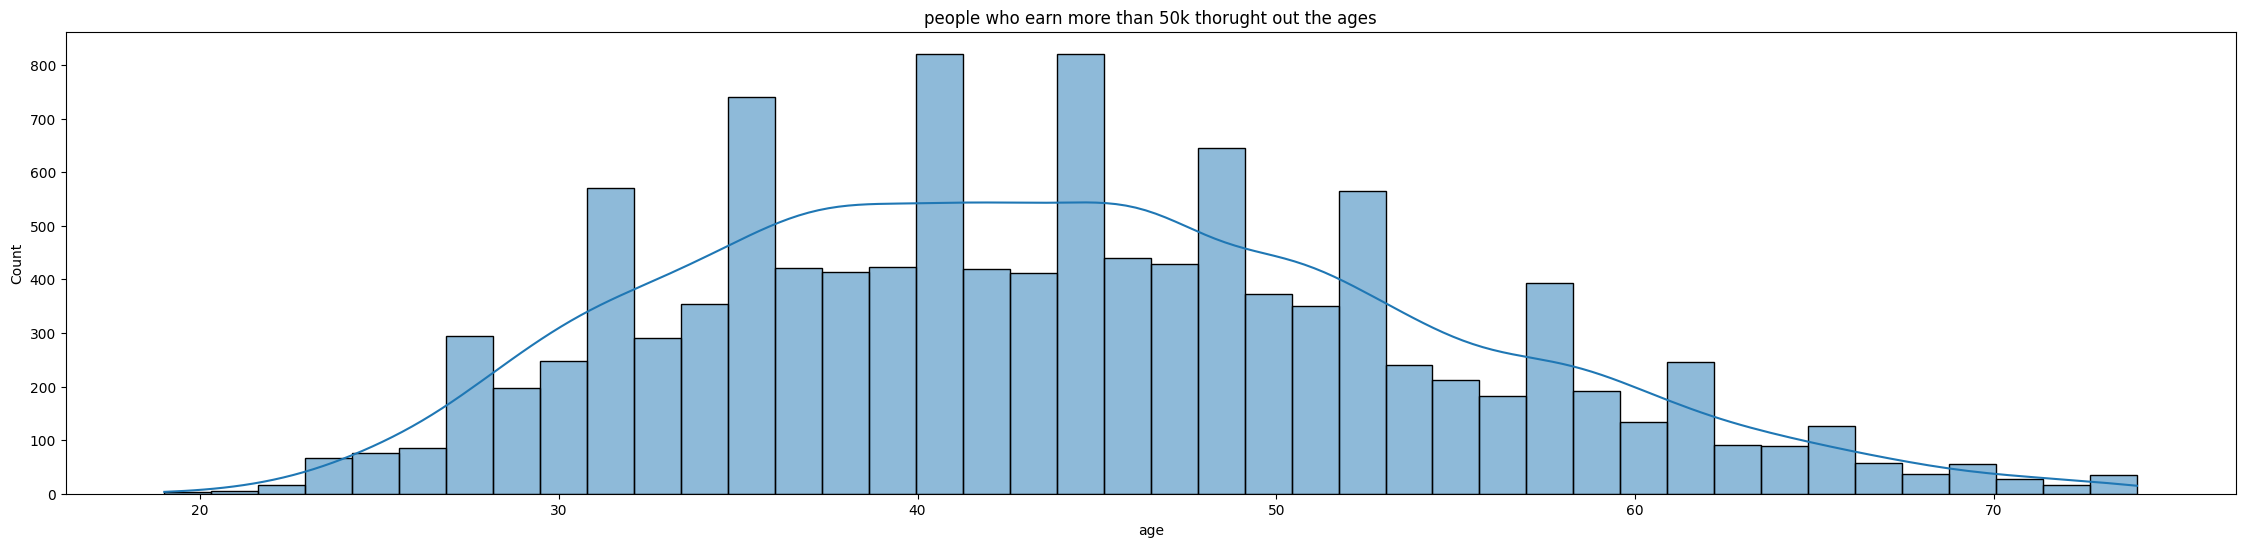

In [154]:
# Lets drop the outliers of the people who earn more than 50K and see the distribution as well as the boxplot
adult_dataset = adult_dataset.drop(adult_dataset[(adult_dataset['age'] >= 75) & (adult_dataset['income-per-year'] == '>50K')].index)

# Distribution
above50k_earn = adult_dataset[adult_dataset['income-per-year'] == '>50K']['age']
plt.figure(figsize=(28, 6))
plt.title("people who earn more than 50k thorught out the ages")
sns.histplot(above50k_earn,kde=True, label=column)


Now we can see that the people who earn more than 50k throughout the ages takes a normal distribution which indicates now the age class is balanced.

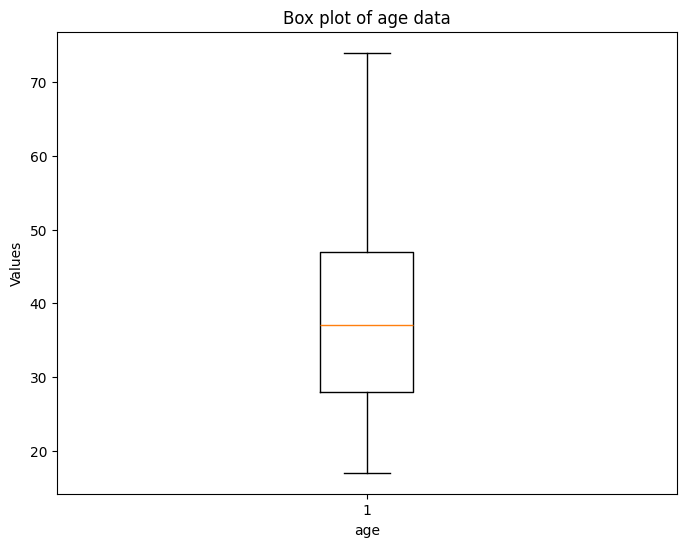

In [155]:
# Boxplot after cleaning the outliers

# Create a box plot for age feature
plt.figure(figsize=(8, 6))
plt.boxplot(adult_dataset['age'])
plt.title('Box plot of age data')
plt.xlabel('age')
plt.ylabel('Values')
plt.show()

There are no more outliers now.

### Final Weight Outliers

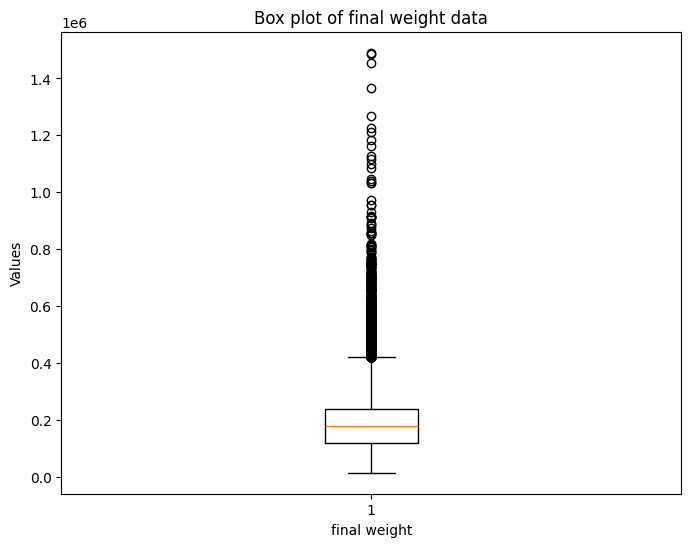

In [156]:
# Boxplot to see outliers of the final weight column

# Create a box plot for fnlwgt feature
plt.figure(figsize=(8, 6))
plt.boxplot(adult_dataset['fnlwgt'])
plt.title('Box plot of final weight data')
plt.xlabel('final weight')
plt.ylabel('Values')
plt.show()

<Axes: title={'center': 'fnlwgt Distribution in the dataset'}, xlabel='fnlwgt', ylabel='Count'>

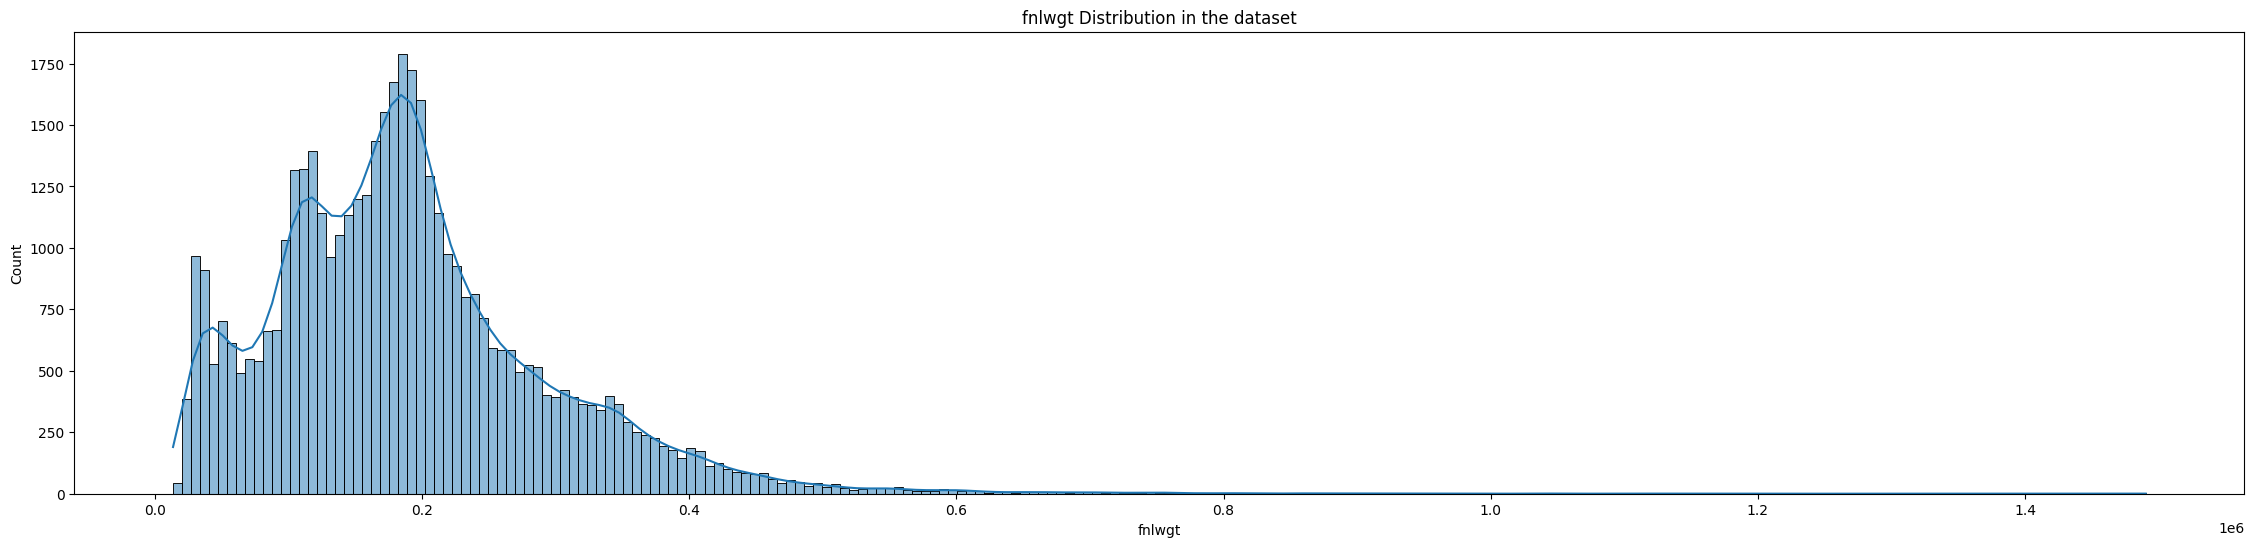

In [157]:
# Final weight Distribution
plt.figure(figsize=(28, 6))
plt.title("fnlwgt Distribution in the dataset")
sns.histplot(adult_dataset['fnlwgt'], kde=True, label=column)


In [158]:
# Upper Bound of the Dataset

# Calculate Q1, Q3, and IQR
Q1 = adult_dataset['fnlwgt'].quantile(0.25)
Q3 = adult_dataset['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1

# Compute upper whisker value
upper_whisker = Q3 + 1.5 * IQR

# Find the highest data point within the upper whisker range
upper_bound_data = adult_dataset['fnlwgt'][adult_dataset['fnlwgt'] <= upper_whisker].max()

print("Upper bound within the boxplot:", upper_bound_data)

# Number of records upper the bound of the dataset\
fnlwgt_outliers = adult_dataset[adult_dataset['fnlwgt'] >= 419053].value_counts().sum()
print(f'number of outliers :- {fnlwgt_outliers}')

Upper bound within the boxplot: 419053
number of outliers :- 1342


In [159]:
# Removing the final weight outliers
adult_dataset = adult_dataset.drop(adult_dataset[adult_dataset['fnlwgt'] >= 419053].index)

Let's Check the boxplot and the distribution of the final weight

1. Distribution

<Axes: title={'center': 'fnlwgt Distribution in the dataset'}, xlabel='fnlwgt', ylabel='Count'>

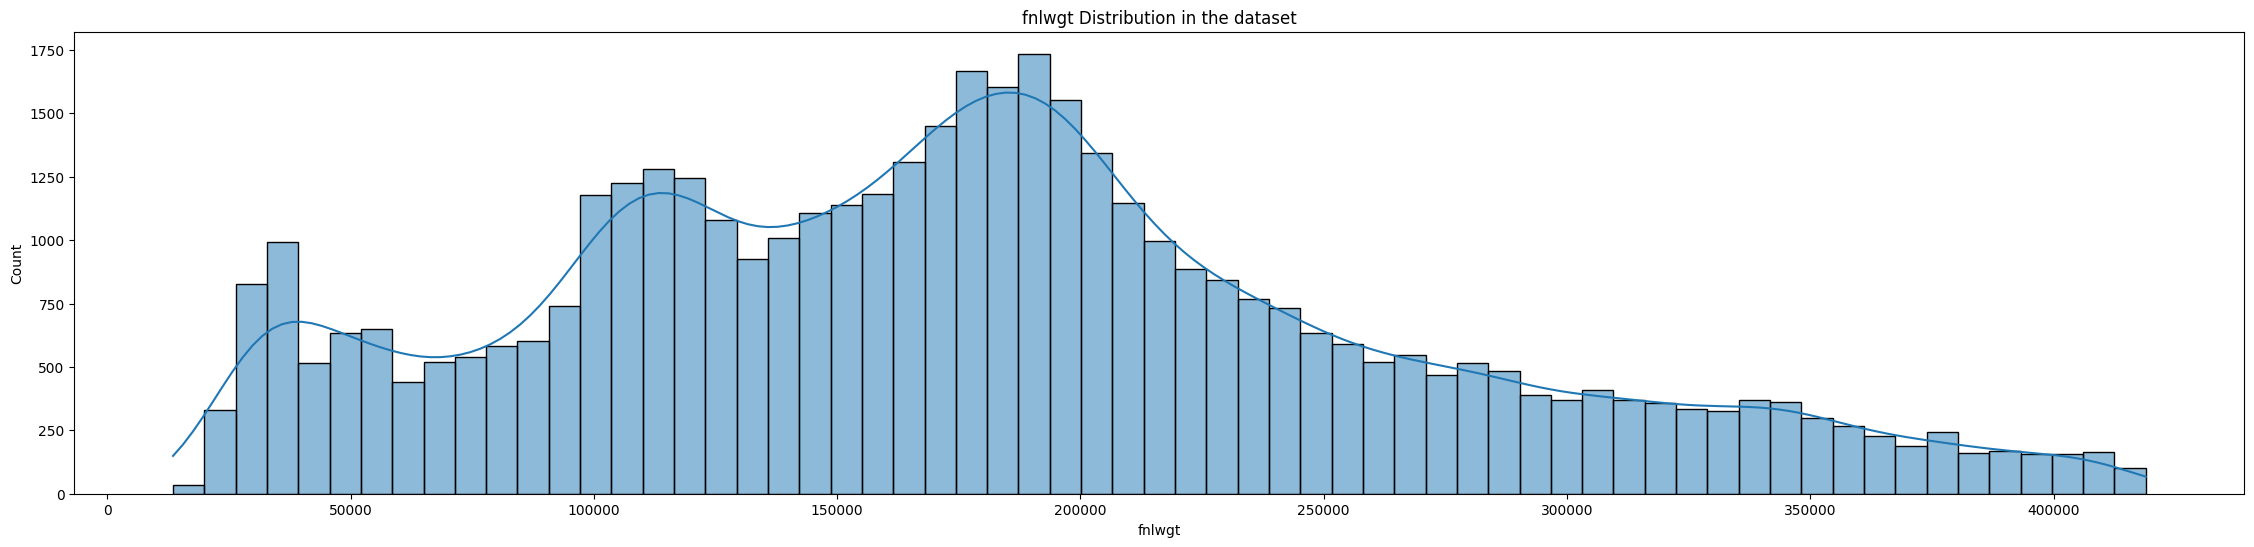

In [160]:
# Final weight Distribution
plt.figure(figsize=(28, 6))
plt.title("fnlwgt Distribution in the dataset")
sns.histplot(adult_dataset['fnlwgt'], kde=True, label=column)

2. Boxplot

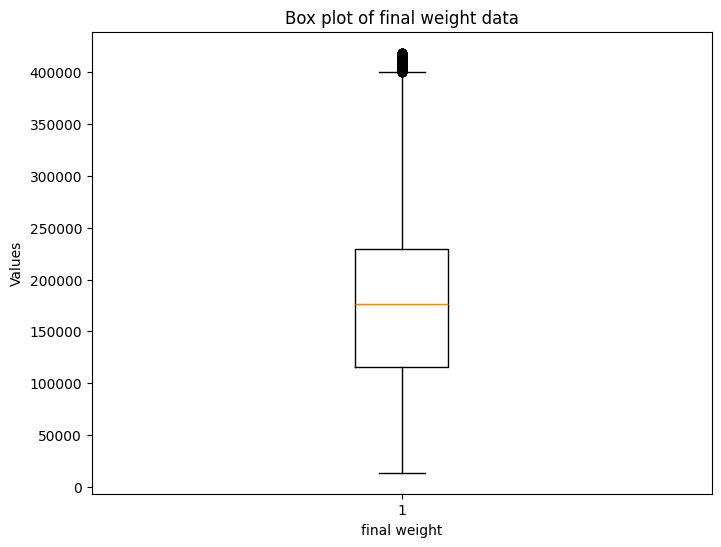

In [161]:
# Boxplot to see outliers of the final weight column

# Create a box plot for fnlwgt feature
plt.figure(figsize=(8, 6))
plt.boxplot(adult_dataset['fnlwgt'])
plt.title('Box plot of final weight data')
plt.xlabel('final weight')
plt.ylabel('Values')
plt.show()

#### Working Hours per Week outliers

Let's Boxplot and see the outliers of the working hours

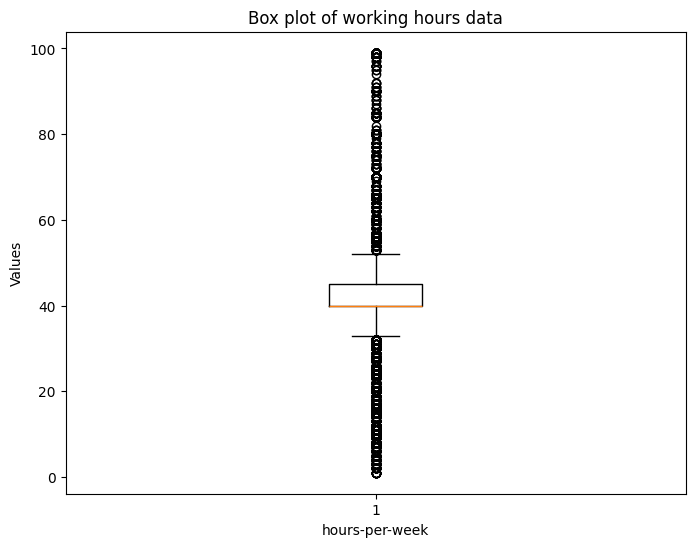

In [162]:
# Create a box plot for working hours feature

plt.figure(figsize=(8, 6))
plt.boxplot(adult_dataset['hours-per_week'])
plt.title('Box plot of working hours data')
plt.xlabel('hours-per-week')
plt.ylabel('Values')
plt.show()

<Axes: title={'center': 'Working Hours Distribution in the dataset'}, xlabel='hours-per_week', ylabel='Count'>

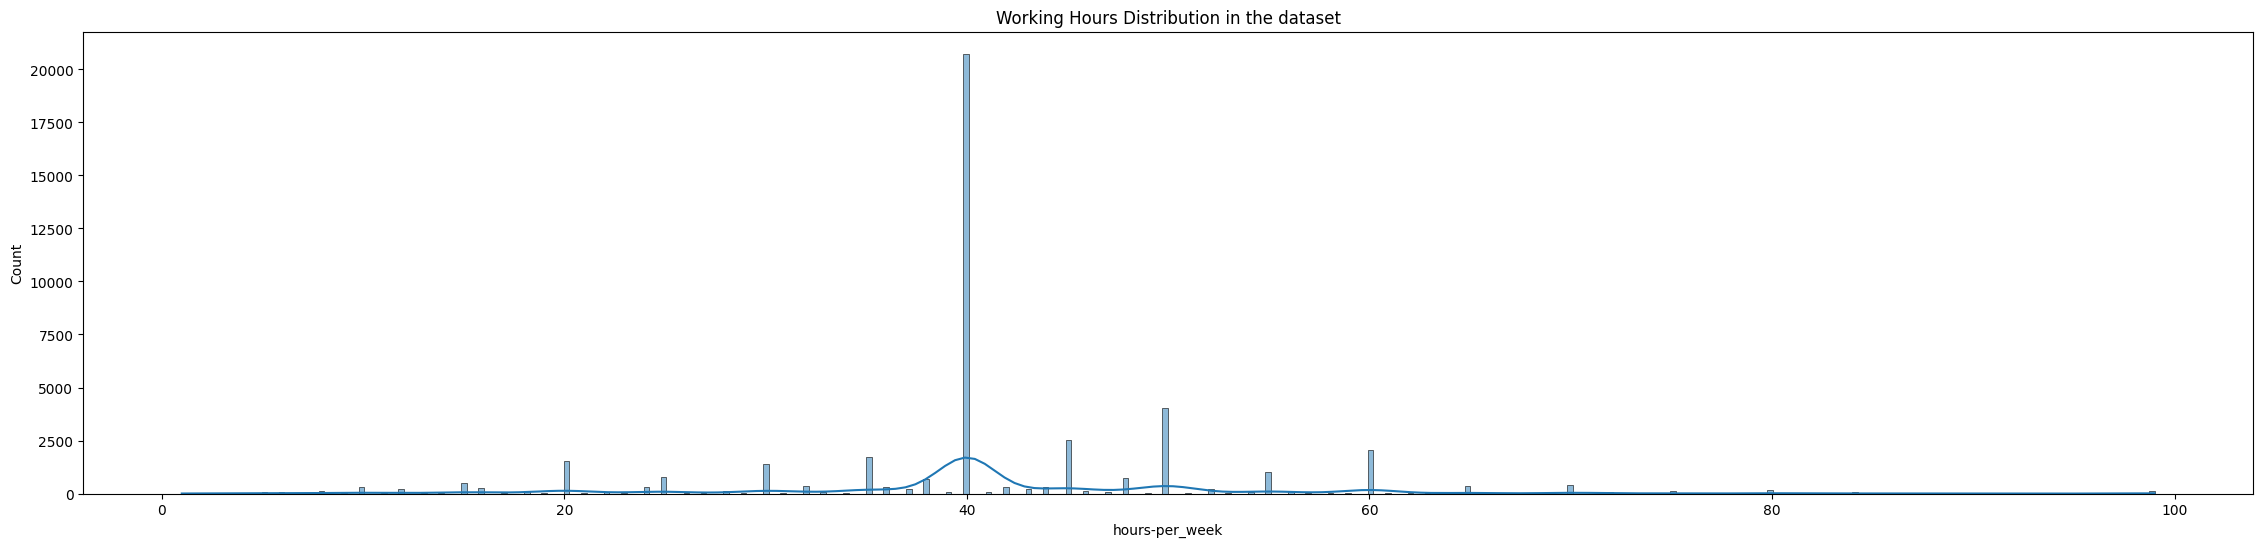

In [163]:
# Working Hours Distribution
plt.figure(figsize=(28, 6))
plt.title("Working Hours Distribution in the dataset")
sns.histplot(adult_dataset['hours-per_week'], kde=True, label=column)

#### Distribution of working hours among the ages

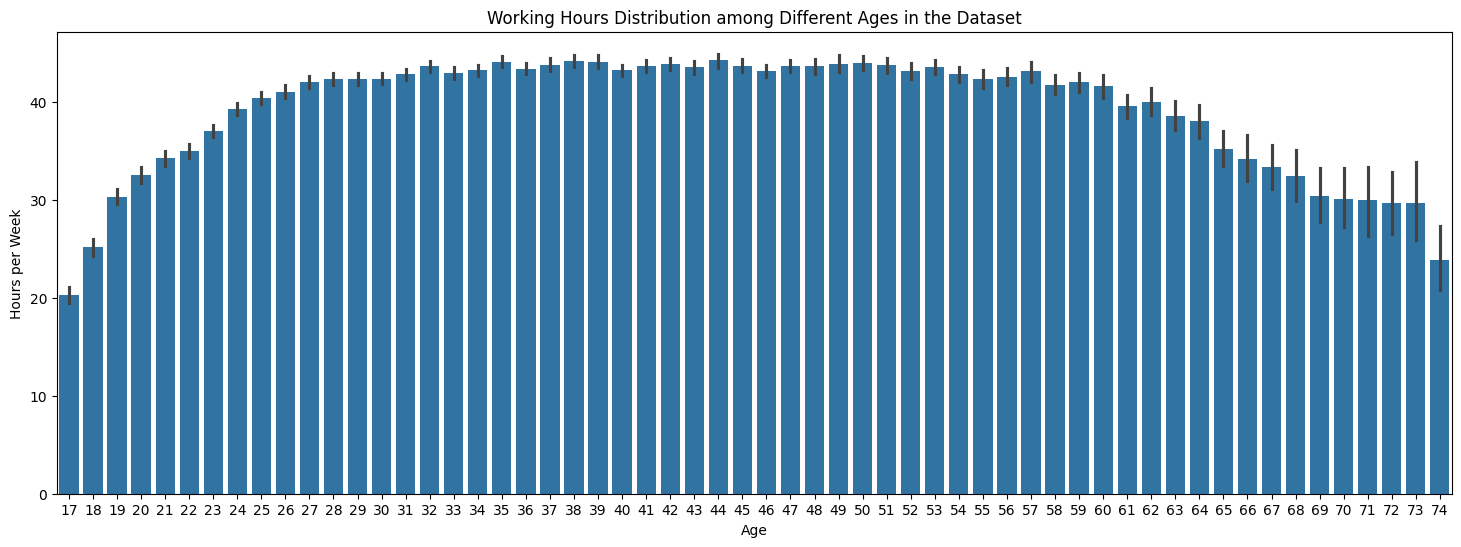

In [164]:
# Working Hour Distribution by ages

plt.figure(figsize=(18, 6))
plt.title("Working Hours Distribution among Different Ages in the Dataset")
sns.barplot(data=adult_dataset, x='age', y='hours-per_week')
plt.xlabel("Age")
plt.ylabel("Hours per Week")
plt.show()

This dataset clearly shows that there are huge outliers when compare it with the age therefore the dataset needs to be cleaned but it harder to clean because of the importance of the class. If we get rid of the outliers in this class the performance will be deliberately reduce.

### Checking the Correlation between Features

In [165]:
adult_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43998 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43998 non-null  int32 
 1   workclass        43998 non-null  object
 2   fnlwgt           43998 non-null  int32 
 3   education        43998 non-null  object
 4   education-num    43998 non-null  int32 
 5   marital-status   43998 non-null  object
 6   occupation       43998 non-null  object
 7   relationship     43998 non-null  object
 8   race             43998 non-null  object
 9   sex              43998 non-null  object
 10  capital-gain     43998 non-null  int32 
 11  capital-loss     43998 non-null  int32 
 12  hours-per_week   43998 non-null  int32 
 13  native-country   43998 non-null  object
 14  income-per-year  43998 non-null  object
dtypes: int32(6), object(9)
memory usage: 4.4+ MB


In [166]:
adult_dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per_week,native-country,income-per-year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [167]:
# Encoding the values before checking the correlation
categorical_columns = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income-per-year']  

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each categorical column and a its values
for col in categorical_columns:
    adult_dataset[col] = label_encoder.fit_transform(adult_dataset[col])

In [168]:
adult_dataset.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per_week,native-country,income-per-year
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


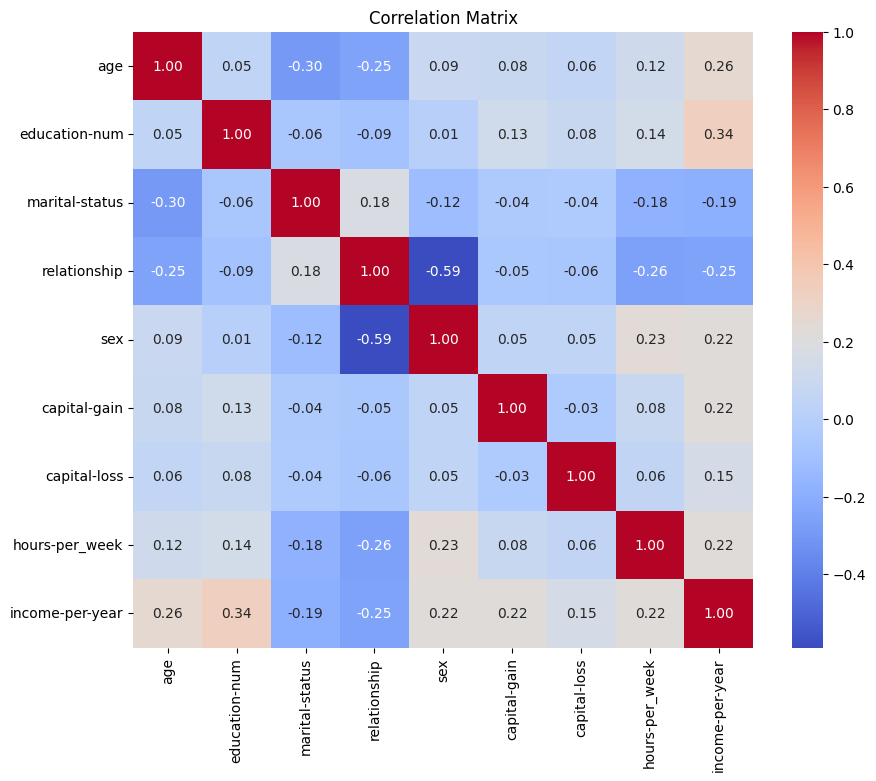

In [173]:
# Generate correlation matrix
correlation_matrix = adult_dataset.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [169]:
# Comparing the correlation to the income
correlation_matrix = adult_dataset.corr()['income-per-year'].sort_values(ascending=False)
print(correlation_matrix)

income-per-year    1.000000
education-num      0.335188
age                0.258617
hours-per_week     0.220902
capital-gain       0.219106
sex                0.217795
capital-loss       0.151185
education          0.078789
race               0.066539
occupation         0.043299
native-country     0.020596
workclass          0.013751
fnlwgt            -0.000634
marital-status    -0.194138
relationship      -0.253020
Name: income-per-year, dtype: float64


When Checking the variance of the dataset, There are the correlation to the income. There are some positive correlations as well as some negative too. Therefore lets remove some of the low correlations in the positive features as well as in the negative side.

Low Correlation Features

1. education
2. race
3. occupation
4. fnlwgt
5. native-country
6. workclass

In [170]:
# Removing the low correlation rows from the dataset
adult_dataset = adult_dataset.drop(['education','race','occupation','fnlwgt','native-country','workclass'],axis=1)

In [171]:
adult_dataset.head()

,age,education-num,marital-status,relationship,sex,capital-gain,capital-loss,hours-per_week,income-per-year
0,39,13,4,1,1,2174,0,40,0
1,50,13,2,0,1,0,0,13,0
2,38,9,0,1,1,0,0,40,0
3,53,7,2,0,1,0,0,40,0
4,28,13,2,5,0,0,0,40,0


In [172]:
# Saving the dataset to fetch to the model evaluation
adult_dataset.to_csv('pre_processed_dataset.csv',index=False)